<a href="https://colab.research.google.com/github/inConsciousness/attention_mechanism_369/blob/main/attention_mechanisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Kaggle API for dataset download
!pip install kaggle

# Install PyTorch and related libraries
!pip install torch torchvision

# Install additional libraries for visualizations and progress bars
!pip install matplotlib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
# Configure Kaggle API
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
files.upload()  # Upload kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srivardhanmuthyala","key":"2a12a9bdb02acf58de00584ac3a3529c"}'}

In [4]:
# Download the Flickr8k Dataset using Kaggle API
!kaggle datasets download -d adityajn105/flickr8k

# Unzip the dataset into a folder named 'flickr8k_dataset'
!unzip -o flickr8k.zip -d ./flickr8k_dataset/

Streaming output truncated to the last 5000 lines.
  inflating: ./flickr8k_dataset/Images/2844846111_8c1cbfc75d.jpg  
  inflating: ./flickr8k_dataset/Images/2844963839_ff09cdb81f.jpg  
  inflating: ./flickr8k_dataset/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: ./flickr8k_dataset/Images/2845691057_d4ab89d889.jpg  
  inflating: ./flickr8k_dataset/Images/2845845721_d0bc113ff7.jpg  
  inflating: ./flickr8k_dataset/Images/2846037553_1a1de50709.jpg  
  inflating: ./flickr8k_dataset/Images/2846785268_904c5fcf9f.jpg  
  inflating: ./flickr8k_dataset/Images/2846843520_b0e6211478.jpg  
  inflating: ./flickr8k_dataset/Images/2847514745_9a35493023.jpg  
  inflating: ./flickr8k_dataset/Images/2847615962_c330bded6e.jpg  
  inflating: ./flickr8k_dataset/Images/2847859796_4d9cb0d31f.jpg  
  inflating: ./flickr8k_dataset/Images/2848266893_9693c66275.jpg  
  inflating: ./flickr8k_dataset/Images/2848571082_26454cb981.jpg  
  inflating: ./flickr8k_dataset/Images/2848895544_6d06210e9d.jpg  
  inflating

In [5]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [6]:
import os

# Set dataset path
DATASET_PATH = "flickr8k_dataset"

# Check contents
print("Files in dataset folder:", os.listdir(DATASET_PATH))

# Check images inside the folder
image_dir = os.path.join(DATASET_PATH, "Images")
print("Sample images:", os.listdir(image_dir)[:5])

# Check captions file existence
captions_file = os.path.join(DATASET_PATH, "captions.txt")
if os.path.exists(captions_file):
    print("Captions file found.")
else:
    print("Captions file missing. Please check the dataset.")


Files in dataset folder: ['captions.txt', 'Images']
Sample images: ['2478929971_9eb6c074b6.jpg', '1456630952_dd4778a48f.jpg', '3350671534_2a5d45a961.jpg', '3259992722_4c5e895734.jpg', '2234910971_80e0325918.jpg']
Captions file found.


In [7]:
import nltk
import string
import re
import csv

# Download NLTK resources
nltk.download('punkt_tab')

# Function to load and preprocess captions
def load_captions(file_path):
    captions_dict = {}

    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter=',')  # Using comma as delimiter

        for row in reader:
            if len(row) < 2:
                print(f"Skipping malformed line: {row}")
                continue

            img_id = row[0].split("#")[0].strip()
            caption = row[1].strip().lower()
            caption = caption.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
            caption = re.sub(r"\s+", " ", caption).strip()  # Remove extra spaces
            tokens = nltk.word_tokenize(caption)  # Tokenize the caption

            if img_id not in captions_dict:
                captions_dict[img_id] = []

            captions_dict[img_id].append(tokens)  # Store tokenized caption

    return captions_dict

# Load and preprocess captions
captions_file = 'flickr8k_dataset/captions.txt'
captions = load_captions(captions_file)

print(f"Loaded {len(captions)} images with captions.")
print(f"Sample preprocessed caption: {captions[list(captions.keys())[0]]}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Loaded 8092 images with captions.
Sample preprocessed caption: [['caption']]


In [8]:
from collections import Counter

# Special tokens
SPECIAL_TOKENS = ["<PAD>", "<SOS>", "<EOS>", "<UNK>"]

# Function to build vocabulary from captions
def build_vocab(captions_dict, min_freq=5):
    word_counter = Counter()

    # Count frequency of each word in the captions
    for img_id, captions in captions_dict.items():
        for caption in captions:
            word_counter.update(caption)

    # Initialize vocabulary with special tokens first
    vocab = {token: idx for idx, token in enumerate(SPECIAL_TOKENS)}
    idx = len(vocab)

    # Add words to vocabulary if they meet the frequency threshold
    for word, freq in word_counter.items():
        if freq >= min_freq and word not in vocab:
            vocab[word] = idx
            idx += 1

    return vocab

# Build vocabulary
vocab = build_vocab(captions, min_freq=5)

# Ensure all special tokens are present
for token in SPECIAL_TOKENS:
    if token not in vocab:
        vocab[token] = len(vocab)

# Print vocabulary details
print(f"Vocabulary size: {len(vocab)}")
print(f"Sample words: {list(vocab.items())[:10]}")

Vocabulary size: 2995
Sample words: [('<PAD>', 0), ('<SOS>', 1), ('<EOS>', 2), ('<UNK>', 3), ('a', 4), ('child', 5), ('in', 6), ('pink', 7), ('dress', 8), ('is', 9)]


In [9]:
# Function to encode captions into numeric sequences
def encode_captions(captions_dict, vocab):
    encoded_captions = {}
    for img_id, captions in captions_dict.items():
        encoded_captions[img_id] = []
        for caption in captions:
            encoded_caption = [vocab["<SOS>"]] + \
                              [vocab.get(word, vocab["<UNK>"]) for word in caption] + \
                              [vocab["<EOS>"]]
            encoded_captions[img_id].append(encoded_caption)
    return encoded_captions

# Encode captions using vocabulary
encoded_captions = encode_captions(captions, vocab)

# Print sample encoded caption
sample_img = list(encoded_captions.keys())[0]
print(f"Encoded captions for {sample_img}: {encoded_captions[sample_img]}")

Encoded captions for image: [[1, 3, 2]]


In [10]:
import torch
from torch.nn.utils.rnn import pad_sequence

# Function to pad captions to a fixed length
def pad_captions(encoded_captions, pad_value=0, max_length=20):
    padded_captions = {}
    for img_id, captions in encoded_captions.items():
        padded_captions[img_id] = [
            caption + [pad_value] * (max_length - len(caption)) if len(caption) < max_length else caption[:max_length]
            for caption in captions
        ]
    return padded_captions

# Pad encoded captions
max_caption_length = 20  # Choose based on dataset analysis
padded_captions = pad_captions(encoded_captions, pad_value=vocab["<PAD>"], max_length=max_caption_length)

# Print sample padded caption
print(f"Padded captions for {sample_img}: {padded_captions[sample_img]}")


Padded captions for image: [[1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


2) Step 2 is all about Dataset Preparation and DataLoader Setup

In [11]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

# Custom Dataset for Image Captioning
class CaptionDataset(Dataset):
    def __init__(self, image_folder, captions_dict, vocab, transform=None):
        self.image_folder = image_folder
        self.captions_dict = captions_dict
        self.vocab = vocab
        self.transform = transform
        self.image_ids = [img_id for img_id in captions_dict.keys() if os.path.exists(os.path.join(image_folder, img_id))]

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = self.image_ids[idx]
        img_path = os.path.join(self.image_folder, img_name)

        # Load and transform image
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Get the first caption and ensure it's a string
        caption_list = self.captions_dict.get(img_name, [])
        caption = caption_list[0] if caption_list else "<UNK>"
        caption = str(caption).lower()
        caption_tokens = caption.split()

        # Convert words to indices using the vocabulary, and add <SOS> and <EOS> tokens
        caption_idx = [self.vocab.get(word, self.vocab['<UNK>']) for word in caption_tokens]
        caption_idx = [self.vocab['<SOS>']] + caption_idx + [self.vocab['<EOS>']]

        # Pad captions to max length
        max_len = 20
        if len(caption_idx) < max_len:
            caption_idx += [self.vocab['<PAD>']] * (max_len - len(caption_idx))
        else:
            caption_idx = caption_idx[:max_len]

        return image, torch.tensor(caption_idx)

# Data loader collate function to filter out None values
def collate_fn(batch):
    batch = [item for item in batch if item is not None]
    if len(batch) == 0:
        return None, None
    images, captions = zip(*batch)
    images = torch.stack(images, dim=0)
    captions = torch.stack(captions, dim=0)
    return images, captions

# Usage example with data loader
train_loader = torch.utils.data.DataLoader(
    CaptionDataset(image_folder='flickr8k_dataset/Images', captions_dict=captions, vocab=vocab, transform=transforms.ToTensor()),
    batch_size=16,
    shuffle=True,
    collate_fn=collate_fn  # Custom collate function to avoid None values
)

print("Dataset and DataLoader prepared successfully!")

Dataset and DataLoader prepared successfully!


In [12]:
import seaborn as sns

def plot_caption_lengths(captions_dict):
    """
    Plots the distribution of caption lengths.
    """
    caption_lengths = [len(caption) for caption_list in captions_dict.values() for caption in caption_list]
    plt.figure(figsize=(10, 6))
    sns.histplot(caption_lengths, kde=True, bins=30, color='blue')
    plt.title("Distribution of Caption Lengths")
    plt.xlabel("Caption Length (Number of Words)")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

print("Caption length distribution visualization added successfully!")

Caption length distribution visualization added successfully!


In [13]:
def plot_most_frequent_words(captions_dict, top_n=20):
    """
    Plots the most frequent words in the dataset captions.
    """
    from collections import Counter

    word_counts = Counter()
    for caption_list in captions_dict.values():
        for caption in caption_list:
            word_counts.update(caption)

    most_common_words = word_counts.most_common(top_n)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(counts), palette="viridis")
    plt.title(f"Top {top_n} Most Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

print("Most frequent words visualization added successfully!")

Most frequent words visualization added successfully!


In [14]:
def visualize_pixel_distribution(dataset):
    """
    Visualizes the pixel distribution of images in the dataset.
    """
    import numpy as np

    all_pixels = []
    for img, _ in dataset:
        all_pixels.extend(img.flatten().tolist())

    plt.figure(figsize=(10, 6))
    sns.histplot(all_pixels, kde=True, bins=100, color='orange')
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

print("Pixel distribution visualization added successfully!")

Pixel distribution visualization added successfully!


In [15]:
import torchvision.transforms as transforms

# Define image preprocessing transformations
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to ResNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

print("Step 2.2: Image transformations defined successfully!")

Step 2.2: Image transformations defined successfully!


In [16]:
import torch.nn as nn
import torchvision.models as models

# Define encoder model using ResNet50
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        for param in resnet.parameters():
            param.requires_grad = False  # Freeze pre-trained layers
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])  # Remove last FC layer
        self.fc = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size)

    def forward(self, x):
        x = self.resnet(x).squeeze()
        x = self.fc(x)
        x = self.bn(x)
        return x

# Define decoder model using LSTM
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, attention_dim):
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
        self.attention_dim = attention_dim

    def forward(self, features, captions):
        embeddings = self.embed(captions)
        inputs = torch.cat((features.unsqueeze(1), embeddings), 1)
        lstm_out, _ = self.lstm(inputs)
        outputs = self.fc(lstm_out)
        return outputs

    def sample(self, features, max_len=20):
        """
        Generate captions using greedy decoding.
        """
        sampled_ids = []
        input_word = torch.tensor([vocab['<SOS>']], device=features.device).unsqueeze(0)
        hidden = None

        for _ in range(max_len):
            embeddings = self.embed(input_word)
            lstm_out, hidden = self.lstm(embeddings, hidden)
            output = self.fc(lstm_out)

            predicted = output.argmax(2)  # Get most probable word index
            sampled_ids.append(predicted.item())

            if predicted.item() == vocab['<EOS>']:
                break

            input_word = predicted

        return sampled_ids

print("Step 2.3: Models initialized successfully!")

Step 2.3: Models initialized successfully!


In [17]:
import torch
from torch.utils.data import DataLoader, random_split

# Dataset paths and parameters
image_folder = "flickr8k_dataset/Images/"  # Path to image folder
captions_file = "flickr8k_dataset/captions.txt"  # Path to captions file
batch_size = 16
val_split = 0.2  # 20% of data for validation

# Initialize dataset
train_dataset = CaptionDataset(
    image_folder=image_folder,
    captions_dict=captions,  # Ensure 'captions' is preprocessed correctly
    vocab=vocab,            # Ensure vocabulary is properly initialized
    transform=image_transform  # Apply image transformations
)

# Split dataset into training and validation sets
train_size = int((1 - val_split) * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(
    train_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)  # For reproducibility
)

print(f"Training subset size: {len(train_subset)}")
print(f"Validation subset size: {len(val_subset)}")

# Create DataLoaders for training and validation sets
train_loader = DataLoader(
    train_subset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4
)
val_loader = DataLoader(
    val_subset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4
)

# Sanity check: print dataset sizes
print(f"Training DataLoader size: {len(train_loader.dataset)}")
print(f"Validation DataLoader size: {len(val_loader.dataset)}")


Training subset size: 6472
Validation subset size: 1619
Training DataLoader size: 6472
Validation DataLoader size: 1619


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


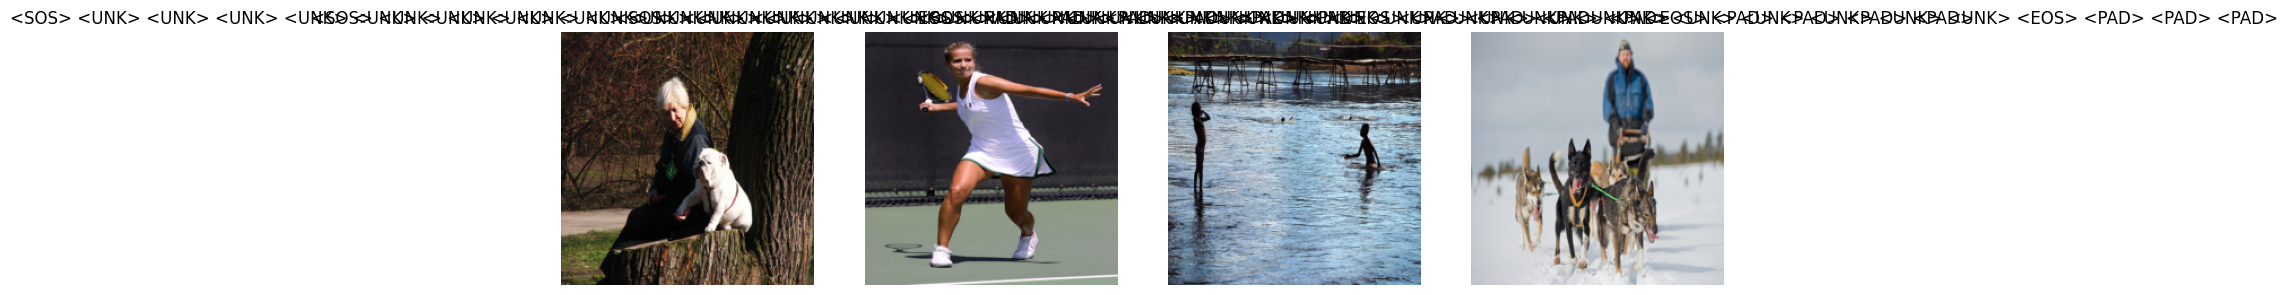

Step 2.5: Batch visualization completed!


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize a batch of images with captions
def visualize_batch(loader, vocab):
    images, captions = next(iter(loader))
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    for i in range(4):
        img = images[i].permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Denormalize
        img = np.clip(img, 0, 1)
        axes[i].imshow(img)

        # Convert caption indices back to words
        caption_text = [word for idx in captions[i].tolist() if idx in vocab.values() for word, id_val in vocab.items() if id_val == idx]
        caption_str = ' '.join(caption_text)

        axes[i].set_title(caption_str)
        axes[i].axis("off")

    plt.show()

visualize_batch(train_loader, vocab)
print("Step 2.5: Batch visualization completed!")

In [19]:
import os
image_folder = "flickr8k_dataset/Images/"
print("Sample images in directory:", os.listdir(image_folder)[:5])

Sample images in directory: ['2478929971_9eb6c074b6.jpg', '1456630952_dd4778a48f.jpg', '3350671534_2a5d45a961.jpg', '3259992722_4c5e895734.jpg', '2234910971_80e0325918.jpg']


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
from collections import Counter
from wordcloud import WordCloud
import torch

# Function to visualize random images with their captions
def visualize_sample_images(dataset, vocab, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        idx = random.randint(0, len(dataset) - 1)
        image, caption_indices = dataset[idx]

        # Convert indices back to words
        caption_text = [word for idx in caption_indices.tolist() if idx in vocab.values()
                        for word, id_val in vocab.items() if id_val == idx]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.permute(1, 2, 0))  # Convert tensor to image
        plt.title(' '.join(caption_text))
        plt.axis('off')

    plt.show()
    print("Sample images with captions visualized successfully!")

# Function to analyze caption lengths
def plot_caption_lengths(captions_dict):
    caption_lengths = [
        len(str(caption).split())
        for caption_list in captions_dict.values()
        for caption in caption_list
        if isinstance(caption, str)  # Ensure it's a string before processing
    ]

    plt.figure(figsize=(8, 6))
    sns.histplot(caption_lengths, kde=True, bins=30, color='blue')
    plt.title("Distribution of Caption Lengths")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()
    print("Caption length distribution visualized successfully!")

In [21]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_most_frequent_words(captions_dict, top_n=20):
    all_words = [
        word
        for caption_list in captions_dict.values()
        for caption in caption_list
        if isinstance(caption, str)
        for word in str(caption).split()
    ]

    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(top_n)

    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Top {top_n} Most Frequent Words in Captions")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()
    print("Most frequent words visualized successfully!")

In [22]:
import random
import numpy as np
import torchvision.transforms as transforms

def visualize_sample_images(dataset, vocab, num_samples=4):
    indices = random.sample(range(len(dataset)), num_samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, idx in enumerate(indices):
        image, caption_idx = dataset[idx]

        img = image.permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Denormalize
        img = np.clip(img, 0, 1)

        # Convert caption indices to words
        caption_tokens = [word for idx in caption_idx.tolist() if idx in vocab.values() for word, id_val in vocab.items() if id_val == idx]
        caption_str = ' '.join(caption_tokens)

        axes[i].imshow(img)
        axes[i].set_title(caption_str)
        axes[i].axis("off")

    plt.show()
    print("Sample images with captions visualized successfully!")

In [23]:
def visualize_pixel_distribution(dataset, num_samples=5):
    pixel_values = []

    for i in range(num_samples):
        image, _ = dataset[i]
        pixel_values.extend(image.flatten().tolist())

    plt.figure(figsize=(8, 6))
    sns.histplot(pixel_values, bins=50, kde=True, color='purple')
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()
    print("Pixel distribution visualized successfully!")

In [24]:
def plot_grad_flow(named_parameters):
    """
    Plots the gradients flowing through different layers during backpropagation.
    """
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if p.requires_grad and p.grad is not None and "bias" not in n:
            layers.append(n)
            ave_grads.append(p.grad.abs().mean().item())
    plt.figure(figsize=(10, 6))
    plt.plot(ave_grads, marker='o', color='b', label="Average Gradient")
    plt.xlabel("Layers")
    plt.ylabel("Average Gradient")
    plt.title("Gradient Flow")
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

print("Gradient flow visualization added successfully!")

Gradient flow visualization added successfully!


In [25]:
def show_dataset_statistics(dataset):
    num_samples = len(dataset)
    print(f"Total number of samples: {num_samples}")

    first_image, first_caption = dataset[0]
    print(f"Sample image shape: {first_image.shape}")
    print(f"Sample caption: {first_caption}")

    caption_lengths = [len(str(caption).split()) for captions in captions_dict.values() for caption in captions]
    print(f"Average caption length: {sum(caption_lengths) / len(caption_lengths):.2f} words")

    print("Dataset statistics displayed successfully!")

In [26]:
print(f"Number of images in captions: {len(captions)}")
print("Sample captions:", list(captions.items())[:5])  # Print first few entries


Number of images in captions: 8092
Sample captions: [('image', [['caption']]), ('1000268201_693b08cb0e.jpg', [['a', 'child', 'in', 'a', 'pink', 'dress', 'is', 'climbing', 'up', 'a', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way'], ['a', 'girl', 'going', 'into', 'a', 'wooden', 'building'], ['a', 'little', 'girl', 'climbing', 'into', 'a', 'wooden', 'playhouse'], ['a', 'little', 'girl', 'climbing', 'the', 'stairs', 'to', 'her', 'playhouse'], ['a', 'little', 'girl', 'in', 'a', 'pink', 'dress', 'going', 'into', 'a', 'wooden', 'cabin']]), ('1001773457_577c3a7d70.jpg', [['a', 'black', 'dog', 'and', 'a', 'spotted', 'dog', 'are', 'fighting'], ['a', 'black', 'dog', 'and', 'a', 'tricolored', 'dog', 'playing', 'with', 'each', 'other', 'on', 'the', 'road'], ['a', 'black', 'dog', 'and', 'a', 'white', 'dog', 'with', 'brown', 'spots', 'are', 'staring', 'at', 'each', 'other', 'in', 'the', 'street'], ['two', 'dogs', 'of', 'different', 'breeds', 'looking', 'at', 'each', 'other', 'on', 'the', 'road'], 

In [27]:
# Verify dataset properties
print(f"Number of images in dataset: {len(train_dataset)}")

# Check first sample
image_sample, caption_sample = train_dataset[1]
print(f"Sample image shape: {image_sample.shape}")
print(f"Sample caption: {caption_sample}")

print("Step 2.6: Dataset verification completed!")

Number of images in dataset: 8091
Sample image shape: torch.Size([3, 224, 224])
Sample caption: tensor([1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Step 2.6: Dataset verification completed!


3) Step 3: Model Architecture Setup

In [28]:
import torch
import torch.nn as nn
import torchvision.models as models
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
learning_rates = []

In [29]:
import torch
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to visualize gradient flow
def plot_grad_flow(named_parameters):
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if p.requires_grad and p.grad is not None and "bias" not in n:
            layers.append(n)
            ave_grads.append(p.grad.abs().mean().item())
    plt.figure(figsize=(10, 6))
    plt.plot(ave_grads, marker='o', color='b', label="Average Gradient")
    plt.xlabel("Layers")
    plt.ylabel("Average Gradient")
    plt.title("Gradient Flow")
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

In [30]:
# Function to validate the model
def validate_model(encoder, decoder, val_loader, criterion, vocab_size, device):
    encoder.eval()
    decoder.eval()
    val_loss = 0
    with torch.no_grad():
        for images, captions in val_loader:
            images, captions = images.to(device), captions.to(device)
            features = encoder(images)
            outputs = decoder(features, captions)
            val_loss += criterion(outputs.view(-1, vocab_size), captions.view(-1)).item()
    encoder.train()
    decoder.train()
    return val_loss / len(val_loader)

In [31]:
def train_model(encoder, decoder, train_loader, val_loader, criterion, encoder_optimizer, decoder_optimizer, num_epochs, vocab_size, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    learning_rates = []

    for epoch in range(num_epochs):
        train_loss = 0
        correct = 0
        total = 0

        print(f"Epoch {epoch + 1}/{num_epochs}:")
        for images, captions in tqdm(train_loader, desc="Training Progress"):
            images, captions = images.to(device), captions.to(device)

            # Forward pass
            features = encoder(images)
            outputs = decoder(features, captions)

            # Debugging shapes
            print(f"Outputs shape: {outputs[:, :-1, :].shape}, Captions shape: {captions.shape}")

            # Compute loss
            loss = criterion(outputs[:, :-1, :].contiguous().view(-1, vocab_size), captions.contiguous().view(-1))
            train_loss += loss.item()

            # Calculate accuracy
            predicted = torch.argmax(outputs[:, :-1, :], dim=2)
            correct += (predicted == captions).sum().item()
            total += captions.numel()

            # Backpropagation
            encoder_optimizer.zero_grad()
            decoder_optimizer.zero_grad()
            loss.backward()
            encoder_optimizer.step()
            decoder_optimizer.step()

        # Track average loss and accuracy for this epoch
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct / total * 100)

        # Store learning rate
        for param_group in encoder_optimizer.param_groups:
            learning_rates.append(param_group['lr'])

        # Validation phase
        val_loss = 0
        with torch.no_grad():
            for images, captions in val_loader:
                images, captions = images.to(device), captions.to(device)
                features = encoder(images)
                outputs = decoder(features, captions)
                val_loss += criterion(outputs[:, :-1, :].contiguous().view(-1, vocab_size), captions.contiguous().view(-1)).item()

        val_losses.append(val_loss / len(val_loader))

        print(f"Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.2f}%")

    return train_losses, val_losses, train_accuracies, learning_rates

In [32]:
import matplotlib.pyplot as plt

def plot_loss_curve(train_losses, val_losses):
    """
    Plots the training and validation loss curves.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label="Training Loss", marker='o')
    plt.plot(val_losses, label="Validation Loss", marker='x')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid()
    plt.show()

print("Loss curve visualization added successfully!")

Loss curve visualization added successfully!


In [33]:
def plot_accuracy_curve(train_accuracies, val_accuracies=None):
    """
    Plots the training and validation accuracy curves.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracies, label="Training Accuracy", marker='o')
    if val_accuracies:
        plt.plot(val_accuracies, label="Validation Accuracy", marker='x')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

print("Accuracy curve visualization added successfully!")

Accuracy curve visualization added successfully!


In [34]:
def plot_learning_rate(learning_rates):
    """
    Plots the learning rate over epochs.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, label="Learning Rate", marker='o', color='purple')
    plt.xlabel("Epochs")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

print("Learning rate visualization added successfully!")


Learning rate visualization added successfully!


In [35]:
# Training hyperparameters
embed_size = 256
hidden_size = 512
learning_rate = 1e-4
num_epochs = 10

# Ensure special tokens are present in vocab
assert '<PAD>' in vocab and '<SOS>' in vocab and '<EOS>' in vocab and '<UNK>' in vocab, "Special tokens are missing from vocab"

vocab_size = len(vocab)

# Initialize models
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size, attention_dim=256)

# Move models to GPU/CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define loss function and optimizers
criterion = nn.CrossEntropyLoss(ignore_index=vocab['<PAD>'])
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=learning_rate)

print("Step 3.2: Model initialization and setup completed!")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 140MB/s]


Step 3.2: Model initialization and setup completed!


In [36]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_batch(loader, vocab):
    """Visualizes a batch of images with corresponding captions."""
    images, captions = next(iter(loader))
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    for i in range(4):
        img = images[i].permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Denormalize
        img = np.clip(img, 0, 1)
        axes[i].imshow(img)

        caption_text = [word for idx in captions[i].tolist() if idx in vocab.values() for word, id_val in vocab.items() if id_val == idx]
        caption_str = ' '.join(caption_text)

        axes[i].set_title(caption_str)
        axes[i].axis("off")

    plt.show()
    print("Data visualization completed!")

In [37]:
import os

# Path to dataset folder
image_folder = "flickr8k_dataset/Images/"

# List the first few files to check naming conventions
print("Sample files:", os.listdir(image_folder)[:5])

# Check if the specific file exists
for i in os.listdir(image_folder):
  file_to_check = f"flickr8k_dataset/Images/{i}"
  if os.path.exists(file_to_check):
      print(f"File '{file_to_check}' exists.")
  else:
      print(f"File '{file_to_check}' not found!")

Streaming output truncated to the last 5000 lines.
File 'flickr8k_dataset/Images/1835511273_790eaae6e6.jpg' exists.
File 'flickr8k_dataset/Images/3688858505_e8afd1475d.jpg' exists.
File 'flickr8k_dataset/Images/2807209904_389d81f33a.jpg' exists.
File 'flickr8k_dataset/Images/524031846_28b11bc0e5.jpg' exists.
File 'flickr8k_dataset/Images/95734038_2ab5783da7.jpg' exists.
File 'flickr8k_dataset/Images/421932359_edbf181f44.jpg' exists.
File 'flickr8k_dataset/Images/1480712062_32a61ad4b7.jpg' exists.
File 'flickr8k_dataset/Images/2266144051_614b2d62b0.jpg' exists.
File 'flickr8k_dataset/Images/3166969425_b5ace2f9c2.jpg' exists.
File 'flickr8k_dataset/Images/2090327868_9f99e2740d.jpg' exists.
File 'flickr8k_dataset/Images/2500354186_0836309cc9.jpg' exists.
File 'flickr8k_dataset/Images/245442617_407eba1e98.jpg' exists.
File 'flickr8k_dataset/Images/3580741947_cc64a83648.jpg' exists.
File 'flickr8k_dataset/Images/3184206563_5435f2b494.jpg' exists.
File 'flickr8k_dataset/Images/2735158990_56f

Epoch 1/10:


Training Progress:   0%|          | 0/405 [00:00<?, ?it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 3/405 [00:03<05:26,  1.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 5/405 [00:03<02:58,  2.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 8/405 [00:03<01:36,  4.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 10/405 [00:03<01:14,  5.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 12/405 [00:04<01:06,  5.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 14/405 [00:04<00:59,  6.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 16/405 [00:04<01:03,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 18/405 [00:05<00:58,  6.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 20/405 [00:05<00:53,  7.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▌         | 22/405 [00:05<00:52,  7.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 24/405 [00:05<00:51,  7.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▋         | 26/405 [00:06<00:58,  6.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 27/405 [00:06<01:01,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 29/405 [00:06<01:01,  6.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:07<00:55,  6.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 34/405 [00:07<00:59,  6.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 36/405 [00:07<01:01,  5.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 38/405 [00:08<01:01,  6.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|▉         | 40/405 [00:08<01:03,  5.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|█         | 42/405 [00:09<01:05,  5.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 44/405 [00:09<01:03,  5.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█▏        | 46/405 [00:09<01:10,  5.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 47/405 [00:10<01:05,  5.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  12%|█▏        | 48/405 [00:10<01:08,  5.22it/s]

Training Progress:  12%|█▏        | 50/405 [00:10<01:12,  4.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 52/405 [00:10<01:02,  5.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 54/405 [00:11<01:11,  4.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 56/405 [00:11<01:05,  5.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 58/405 [00:12<01:13,  4.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 59/405 [00:12<01:08,  5.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 62/405 [00:13<01:08,  5.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 64/405 [00:13<00:52,  6.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▋        | 66/405 [00:13<00:49,  6.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 69/405 [00:13<00:43,  7.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 71/405 [00:14<00:37,  8.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 73/405 [00:14<00:41,  7.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 77/405 [00:14<00:34,  9.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 79/405 [00:14<00:33,  9.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 81/405 [00:15<00:31, 10.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 85/405 [00:15<00:29, 10.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██▏       | 87/405 [00:15<00:31, 10.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 91/405 [00:16<00:30, 10.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 95/405 [00:16<00:31,  9.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 99/405 [00:17<00:31,  9.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▌       | 103/405 [00:17<00:29, 10.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 105/405 [00:17<00:29, 10.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 109/405 [00:18<00:30,  9.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 111/405 [00:18<00:30,  9.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 113/405 [00:18<00:28, 10.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  28%|██▊       | 115/405 [00:18<00:31,  9.24it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 117/405 [00:18<00:27, 10.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 119/405 [00:19<00:27, 10.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 123/405 [00:19<00:27, 10.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███▏      | 127/405 [00:19<00:30,  9.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 129/405 [00:20<00:30,  9.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 131/405 [00:20<00:26, 10.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 134/405 [00:20<00:31,  8.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 135/405 [00:20<00:30,  8.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 139/405 [00:21<00:27,  9.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▍      | 141/405 [00:21<00:28,  9.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 142/405 [00:21<00:28,  9.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 144/405 [00:21<00:28,  9.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▋      | 147/405 [00:22<00:32,  7.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  37%|███▋      | 149/405 [00:22<00:31,  8.26it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 151/405 [00:22<00:27,  9.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 155/405 [00:23<00:27,  8.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▊      | 156/405 [00:23<00:28,  8.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 158/405 [00:23<00:38,  6.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 160/405 [00:23<00:35,  6.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 162/405 [00:24<00:40,  6.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 164/405 [00:24<00:36,  6.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 166/405 [00:25<00:42,  5.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████▏     | 168/405 [00:25<00:38,  6.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 169/405 [00:25<00:44,  5.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 172/405 [00:25<00:32,  7.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 174/405 [00:26<00:38,  6.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 176/405 [00:26<00:35,  6.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 178/405 [00:27<00:42,  5.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 180/405 [00:27<00:33,  6.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 182/405 [00:27<00:42,  5.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▌     | 184/405 [00:28<00:36,  6.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 186/405 [00:28<00:40,  5.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▋     | 188/405 [00:28<00:36,  5.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 189/405 [00:29<00:48,  4.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 192/405 [00:29<00:36,  5.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 194/405 [00:30<00:40,  5.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 196/405 [00:30<00:37,  5.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 198/405 [00:30<00:42,  4.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 200/405 [00:31<00:36,  5.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 202/405 [00:31<00:39,  5.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|█████     | 204/405 [00:31<00:34,  5.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 206/405 [00:32<00:41,  4.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████▏    | 208/405 [00:32<00:33,  5.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 210/405 [00:33<00:37,  5.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 212/405 [00:33<00:33,  5.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 215/405 [00:33<00:26,  7.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▎    | 217/405 [00:34<00:24,  7.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 219/405 [00:34<00:20,  8.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 222/405 [00:34<00:20,  8.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▌    | 224/405 [00:34<00:19,  9.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▋    | 228/405 [00:35<00:17, 10.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 230/405 [00:35<00:16, 10.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 232/405 [00:35<00:17, 10.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 236/405 [00:35<00:15, 11.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 238/405 [00:36<00:16, 10.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 240/405 [00:36<00:15, 10.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 242/405 [00:36<00:17,  9.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 244/405 [00:36<00:16,  9.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 247/405 [00:37<00:17,  9.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 251/405 [00:37<00:16,  9.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 253/405 [00:37<00:15,  9.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 256/405 [00:38<00:14, 10.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▎   | 258/405 [00:38<00:14, 10.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 260/405 [00:38<00:13, 10.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 262/405 [00:38<00:16,  8.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  65%|██████▌   | 264/405 [00:38<00:15,  9.01it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 268/405 [00:39<00:14,  9.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 272/405 [00:39<00:14,  9.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 276/405 [00:40<00:13,  9.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▊   | 278/405 [00:40<00:12, 10.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 280/405 [00:40<00:11, 10.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 283/405 [00:41<00:13,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|███████   | 285/405 [00:41<00:13,  9.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 288/405 [00:41<00:12,  9.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 290/405 [00:41<00:12,  8.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 292/405 [00:41<00:11, 10.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 296/405 [00:42<00:11,  9.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▎  | 298/405 [00:42<00:10,  9.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 302/405 [00:42<00:09, 10.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 304/405 [00:43<00:08, 11.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 308/405 [00:43<00:09,  9.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 310/405 [00:43<00:10,  9.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 312/405 [00:44<00:10,  8.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 313/405 [00:44<00:10,  8.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 315/405 [00:44<00:14,  6.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 317/405 [00:44<00:12,  6.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 319/405 [00:45<00:13,  6.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 321/405 [00:45<00:13,  6.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 323/405 [00:46<00:13,  5.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 325/405 [00:46<00:12,  6.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 327/405 [00:46<00:12,  6.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 329/405 [00:47<00:11,  6.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 331/405 [00:47<00:13,  5.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 333/405 [00:47<00:11,  6.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 335/405 [00:48<00:10,  6.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 337/405 [00:48<00:09,  7.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▎ | 339/405 [00:48<00:08,  7.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 341/405 [00:48<00:09,  6.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▍ | 343/405 [00:49<00:08,  6.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 345/405 [00:49<00:08,  7.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 347/405 [00:49<00:09,  5.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 349/405 [00:50<00:09,  6.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▋ | 350/405 [00:50<00:11,  4.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 352/405 [00:50<00:10,  5.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 353/405 [00:50<00:09,  5.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 354/405 [00:51<00:10,  4.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 355/405 [00:51<00:10,  4.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 357/405 [00:51<00:08,  5.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 358/405 [00:51<00:09,  5.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 361/405 [00:52<00:07,  5.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 363/405 [00:52<00:07,  5.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 365/405 [00:53<00:06,  5.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 366/405 [00:53<00:06,  5.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 369/405 [00:53<00:05,  6.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 372/405 [00:54<00:03,  8.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 374/405 [00:54<00:03,  9.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 377/405 [00:54<00:02,  9.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 378/405 [00:54<00:02,  9.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 381/405 [00:55<00:02,  8.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 382/405 [00:55<00:02,  9.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 385/405 [00:55<00:02,  8.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 387/405 [00:55<00:01,  9.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 389/405 [00:55<00:01, 10.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 393/405 [00:56<00:01, 10.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 397/405 [00:56<00:00, 10.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 401/405 [00:57<00:00, 10.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|██████████| 405/405 [00:57<00:00, 12.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Training Progress: 100%|██████████| 405/405 [00:57<00:00,  7.05it/s]


Train Loss: 1.1822, Val Loss: 0.3924, Accuracy: 57.43%
Epoch 2/10:


Training Progress:   1%|          | 3/405 [00:00<01:37,  4.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 5/405 [00:01<01:05,  6.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 7/405 [00:01<00:53,  7.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 9/405 [00:01<00:52,  7.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 13/405 [00:01<00:44,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▎         | 15/405 [00:02<00:43,  8.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 17/405 [00:02<00:48,  7.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 19/405 [00:02<00:45,  8.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▌         | 21/405 [00:02<00:44,  8.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 23/405 [00:03<00:40,  9.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▋         | 26/405 [00:03<00:37, 10.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 28/405 [00:03<00:36, 10.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:03<00:35, 10.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 34/405 [00:04<00:36, 10.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 36/405 [00:04<00:36, 10.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 38/405 [00:04<00:42,  8.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|█         | 41/405 [00:04<00:42,  8.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 43/405 [00:05<00:42,  8.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█▏        | 46/405 [00:05<00:35, 10.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 48/405 [00:05<00:32, 11.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 50/405 [00:05<00:38,  9.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 52/405 [00:05<00:34, 10.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 54/405 [00:06<00:41,  8.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 57/405 [00:06<00:41,  8.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 59/405 [00:06<00:38,  9.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 63/405 [00:07<00:36,  9.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 65/405 [00:07<00:38,  8.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 68/405 [00:07<00:33,  9.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 70/405 [00:07<00:31, 10.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 74/405 [00:08<00:31, 10.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 76/405 [00:08<00:29, 11.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 78/405 [00:08<00:33,  9.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 80/405 [00:08<00:31, 10.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 84/405 [00:09<00:31, 10.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 86/405 [00:09<00:32,  9.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 90/405 [00:09<00:29, 10.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 92/405 [00:10<00:33,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 94/405 [00:10<00:32,  9.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 95/405 [00:10<00:34,  8.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 98/405 [00:10<00:39,  7.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 99/405 [00:11<00:40,  7.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 101/405 [00:11<00:53,  5.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▌       | 103/405 [00:11<00:48,  6.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 104/405 [00:12<00:59,  5.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▋       | 107/405 [00:12<00:43,  6.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 109/405 [00:13<00:58,  5.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 111/405 [00:13<00:50,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 113/405 [00:13<00:56,  5.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 115/405 [00:14<00:47,  6.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 117/405 [00:14<00:51,  5.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 119/405 [00:14<00:46,  6.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|██▉       | 121/405 [00:15<00:49,  5.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 123/405 [00:15<00:40,  6.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 125/405 [00:15<00:51,  5.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 126/405 [00:16<00:48,  5.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 128/405 [00:16<00:55,  4.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 131/405 [00:16<00:40,  6.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 133/405 [00:17<00:53,  5.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 135/405 [00:17<00:46,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 137/405 [00:18<00:47,  5.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 139/405 [00:18<00:45,  5.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▍      | 141/405 [00:18<00:49,  5.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 143/405 [00:19<00:39,  6.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 145/405 [00:19<00:50,  5.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▋      | 147/405 [00:19<00:42,  6.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 149/405 [00:20<00:48,  5.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 151/405 [00:20<00:43,  5.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 153/405 [00:20<00:45,  5.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 155/405 [00:21<00:36,  6.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▊      | 156/405 [00:21<00:38,  6.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 160/405 [00:21<00:27,  8.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 162/405 [00:21<00:24, 10.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 164/405 [00:22<00:22, 10.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 166/405 [00:22<00:23, 10.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 170/405 [00:22<00:24,  9.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 172/405 [00:23<00:25,  9.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 174/405 [00:23<00:23,  9.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 178/405 [00:23<00:23,  9.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 180/405 [00:23<00:23,  9.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 182/405 [00:23<00:21, 10.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 186/405 [00:24<00:21, 10.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▋     | 188/405 [00:24<00:22,  9.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 190/405 [00:24<00:22,  9.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 192/405 [00:25<00:22,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  48%|████▊     | 194/405 [00:25<00:21,  9.61it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 198/405 [00:25<00:19, 10.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 202/405 [00:26<00:22,  9.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|█████     | 204/405 [00:26<00:20,  9.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 206/405 [00:26<00:20,  9.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████▏    | 208/405 [00:26<00:20,  9.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 212/405 [00:27<00:19, 10.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 214/405 [00:27<00:22,  8.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 216/405 [00:27<00:20,  9.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  54%|█████▍    | 219/405 [00:27<00:20,  9.25it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 222/405 [00:28<00:19,  9.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▌    | 224/405 [00:28<00:17, 10.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▋    | 228/405 [00:28<00:16, 10.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 230/405 [00:29<00:18,  9.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 233/405 [00:29<00:17,  9.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 236/405 [00:29<00:16, 10.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 239/405 [00:30<00:19,  8.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 242/405 [00:30<00:17,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 244/405 [00:30<00:16,  9.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 248/405 [00:30<00:16,  9.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 251/405 [00:31<00:20,  7.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 253/405 [00:31<00:21,  6.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 254/405 [00:32<00:26,  5.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 257/405 [00:32<00:22,  6.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 259/405 [00:32<00:24,  5.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 261/405 [00:33<00:21,  6.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 263/405 [00:33<00:21,  6.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 266/405 [00:33<00:17,  7.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 268/405 [00:34<00:18,  7.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▋   | 269/405 [00:34<00:22,  6.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 271/405 [00:34<00:23,  5.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:34<00:18,  6.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 275/405 [00:35<00:23,  5.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 277/405 [00:35<00:20,  6.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 279/405 [00:36<00:21,  5.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 281/405 [00:36<00:19,  6.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 282/405 [00:36<00:19,  6.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|███████   | 284/405 [00:36<00:22,  5.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 286/405 [00:37<00:21,  5.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 288/405 [00:37<00:21,  5.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████▏  | 289/405 [00:37<00:19,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 292/405 [00:38<00:22,  5.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 294/405 [00:38<00:18,  5.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 295/405 [00:39<00:23,  4.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▎  | 298/405 [00:39<00:18,  5.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 300/405 [00:40<00:20,  5.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 302/405 [00:40<00:16,  6.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 304/405 [00:40<00:18,  5.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 306/405 [00:40<00:13,  7.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 308/405 [00:41<00:19,  5.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 310/405 [00:41<00:13,  6.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 314/405 [00:41<00:09,  9.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 316/405 [00:42<00:10,  8.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 320/405 [00:42<00:08, 10.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 322/405 [00:42<00:07, 10.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 324/405 [00:43<00:08,  9.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 326/405 [00:43<00:08,  9.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 329/405 [00:43<00:08,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 331/405 [00:43<00:08,  9.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 334/405 [00:44<00:07,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 337/405 [00:44<00:07,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▎ | 339/405 [00:44<00:06,  9.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 341/405 [00:44<00:06, 10.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▍ | 344/405 [00:45<00:06,  8.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 347/405 [00:45<00:06,  9.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 349/405 [00:45<00:06,  8.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 351/405 [00:46<00:06,  8.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 353/405 [00:46<00:06,  8.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 355/405 [00:46<00:04, 10.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▊ | 359/405 [00:46<00:04,  9.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 361/405 [00:47<00:04,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 363/405 [00:47<00:04,  9.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 366/405 [00:47<00:04,  8.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 368/405 [00:47<00:03,  9.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 372/405 [00:48<00:03, 10.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 376/405 [00:48<00:03,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▎| 379/405 [00:49<00:02,  9.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 381/405 [00:49<00:02,  9.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▍| 384/405 [00:49<00:02,  9.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  96%|█████████▌| 388/405 [00:49<00:01,  9.89it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 392/405 [00:50<00:01,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 394/405 [00:50<00:01,  8.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 397/405 [00:50<00:00,  9.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▊| 399/405 [00:51<00:00,  9.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|█████████▉| 403/405 [00:51<00:00, 12.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Training Progress: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]


Train Loss: 0.3125, Val Loss: 0.2553, Accuracy: 60.19%
Epoch 3/10:


Training Progress:   0%|          | 1/405 [00:00<03:10,  2.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 3/405 [00:00<01:38,  4.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 5/405 [00:01<01:04,  6.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 7/405 [00:01<00:53,  7.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 9/405 [00:01<00:45,  8.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 11/405 [00:01<00:44,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 12/405 [00:01<00:47,  8.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 16/405 [00:02<00:41,  9.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 20/405 [00:02<00:41,  9.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▌         | 22/405 [00:03<00:46,  8.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 24/405 [00:03<00:40,  9.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 28/405 [00:03<00:40,  9.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 30/405 [00:03<00:43,  8.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:04<00:41,  9.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:   8%|▊         | 33/405 [00:04<00:40,  9.27it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 36/405 [00:04<00:40,  9.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|▉         | 40/405 [00:05<00:43,  8.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|█         | 41/405 [00:05<00:46,  7.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 43/405 [00:05<01:00,  5.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 45/405 [00:06<00:56,  6.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 47/405 [00:06<01:03,  5.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 49/405 [00:06<00:55,  6.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 51/405 [00:07<00:55,  6.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 53/405 [00:07<00:46,  7.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▎        | 55/405 [00:07<00:53,  6.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 57/405 [00:07<00:52,  6.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 59/405 [00:08<01:05,  5.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 61/405 [00:08<00:55,  6.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 63/405 [00:09<01:08,  4.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 65/405 [00:09<00:56,  6.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 67/405 [00:09<00:51,  6.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 69/405 [00:10<00:49,  6.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 71/405 [00:10<00:55,  6.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 73/405 [00:10<00:53,  6.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▊        | 75/405 [00:11<01:06,  4.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 77/405 [00:11<00:55,  5.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 79/405 [00:12<01:05,  5.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 81/405 [00:12<00:58,  5.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 83/405 [00:12<01:05,  4.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 85/405 [00:13<00:56,  5.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██▏       | 87/405 [00:13<01:08,  4.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 89/405 [00:13<00:57,  5.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 90/405 [00:14<01:07,  4.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 93/405 [00:14<00:49,  6.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 95/405 [00:15<01:02,  4.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 97/405 [00:15<00:54,  5.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 99/405 [00:15<00:54,  5.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 101/405 [00:16<00:42,  7.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 104/405 [00:16<00:37,  7.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 108/405 [00:16<00:35,  8.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 110/405 [00:17<00:34,  8.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 112/405 [00:17<00:30,  9.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 114/405 [00:17<00:32,  8.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▊       | 116/405 [00:17<00:30,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|██▉       | 120/405 [00:18<00:29,  9.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 124/405 [00:18<00:28, 10.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 126/405 [00:18<00:29,  9.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 128/405 [00:19<00:28,  9.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 130/405 [00:19<00:28,  9.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 134/405 [00:19<00:26, 10.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▎      | 136/405 [00:19<00:24, 10.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▍      | 140/405 [00:20<00:28,  9.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 142/405 [00:20<00:27,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 144/405 [00:20<00:25, 10.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▋      | 147/405 [00:21<00:29,  8.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 149/405 [00:21<00:27,  9.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 152/405 [00:21<00:27,  9.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 154/405 [00:21<00:30,  8.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 157/405 [00:22<00:27,  9.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 160/405 [00:22<00:25,  9.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 162/405 [00:22<00:28,  8.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 164/405 [00:22<00:25,  9.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 166/405 [00:23<00:27,  8.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 169/405 [00:23<00:23,  9.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 172/405 [00:23<00:22, 10.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 174/405 [00:23<00:20, 11.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 176/405 [00:24<00:19, 11.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 180/405 [00:24<00:21, 10.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▌     | 184/405 [00:24<00:23,  9.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 186/405 [00:25<00:23,  9.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▋     | 188/405 [00:25<00:21, 10.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 191/405 [00:25<00:23,  9.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 193/405 [00:25<00:22,  9.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 195/405 [00:26<00:32,  6.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▊     | 197/405 [00:26<00:30,  6.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 199/405 [00:27<00:33,  6.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 201/405 [00:27<00:30,  6.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|█████     | 203/405 [00:27<00:36,  5.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 205/405 [00:28<00:29,  6.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 207/405 [00:28<00:33,  5.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 209/405 [00:28<00:28,  6.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 211/405 [00:29<00:34,  5.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 212/405 [00:29<00:29,  6.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 215/405 [00:29<00:27,  6.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 216/405 [00:29<00:26,  7.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 219/405 [00:30<00:32,  5.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 220/405 [00:30<00:29,  6.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▌    | 223/405 [00:30<00:26,  6.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 225/405 [00:31<00:25,  7.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 227/405 [00:31<00:32,  5.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 229/405 [00:32<00:30,  5.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 231/405 [00:32<00:34,  4.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 233/405 [00:32<00:30,  5.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 235/405 [00:33<00:32,  5.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▊    | 237/405 [00:33<00:29,  5.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 239/405 [00:34<00:33,  4.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 241/405 [00:34<00:29,  5.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 243/405 [00:34<00:33,  4.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 245/405 [00:35<00:29,  5.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 247/405 [00:35<00:32,  4.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████▏   | 249/405 [00:36<00:27,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 251/405 [00:36<00:25,  5.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 252/405 [00:36<00:22,  6.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 255/405 [00:36<00:19,  7.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 256/405 [00:36<00:19,  7.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▎   | 258/405 [00:37<00:18,  7.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 263/405 [00:37<00:14, 10.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▌   | 265/405 [00:37<00:14,  9.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 266/405 [00:38<00:15,  9.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▋   | 269/405 [00:38<00:14,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:38<00:12, 10.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 275/405 [00:38<00:14,  9.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 277/405 [00:39<00:12,  9.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 281/405 [00:39<00:11, 10.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 283/405 [00:39<00:12,  9.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 286/405 [00:40<00:11, 10.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 288/405 [00:40<00:13,  8.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 290/405 [00:40<00:11,  9.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 292/405 [00:40<00:13,  8.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 294/405 [00:40<00:11,  9.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▎  | 298/405 [00:41<00:11,  9.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 300/405 [00:41<00:11,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 302/405 [00:41<00:11,  8.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 304/405 [00:42<00:12,  7.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 306/405 [00:42<00:11,  8.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▋  | 309/405 [00:42<00:10,  8.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 312/405 [00:42<00:10,  8.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 313/405 [00:43<00:10,  9.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▊  | 318/405 [00:43<00:09,  9.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 320/405 [00:43<00:09,  8.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  80%|███████▉  | 322/405 [00:44<00:08,  9.42it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 325/405 [00:44<00:08,  9.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 327/405 [00:44<00:07, 10.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████▏ | 330/405 [00:44<00:08,  9.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 332/405 [00:45<00:08,  8.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 335/405 [00:45<00:07,  9.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 337/405 [00:45<00:07,  8.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▎ | 339/405 [00:45<00:06,  9.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 342/405 [00:46<00:06,  9.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 345/405 [00:46<00:07,  8.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 347/405 [00:46<00:07,  8.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 349/405 [00:47<00:08,  6.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 351/405 [00:47<00:08,  6.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 353/405 [00:48<00:09,  5.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 355/405 [00:48<00:08,  6.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 357/405 [00:48<00:08,  5.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▊ | 359/405 [00:48<00:06,  7.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 361/405 [00:49<00:08,  5.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 363/405 [00:49<00:07,  5.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 365/405 [00:50<00:07,  5.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 367/405 [00:50<00:06,  5.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 369/405 [00:50<00:06,  5.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████▏| 370/405 [00:51<00:05,  5.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 373/405 [00:51<00:05,  5.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 375/405 [00:51<00:05,  5.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 377/405 [00:52<00:05,  5.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▎| 379/405 [00:52<00:04,  5.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 380/405 [00:52<00:04,  5.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▍| 383/405 [00:53<00:03,  6.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 385/405 [00:53<00:03,  5.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 387/405 [00:54<00:02,  6.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 389/405 [00:54<00:03,  5.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 391/405 [00:54<00:02,  5.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 393/405 [00:55<00:02,  5.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 395/405 [00:55<00:01,  6.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 397/405 [00:56<00:01,  4.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 400/405 [00:56<00:00,  7.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 402/405 [00:56<00:00,  8.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|██████████| 405/405 [00:56<00:00,  7.13it/s]

Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Train Loss: 0.2290, Val Loss: 0.2216, Accuracy: 60.23%
Epoch 4/10:


Training Progress:   0%|          | 1/405 [00:00<06:00,  1.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 4/405 [00:01<01:39,  4.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|▏         | 6/405 [00:01<01:28,  4.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 8/405 [00:02<01:13,  5.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 10/405 [00:02<01:14,  5.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 12/405 [00:02<01:04,  6.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 14/405 [00:03<01:09,  5.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 16/405 [00:03<01:01,  6.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 18/405 [00:03<00:56,  6.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 20/405 [00:03<00:51,  7.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▌         | 22/405 [00:04<01:11,  5.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 24/405 [00:04<01:00,  6.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▋         | 26/405 [00:05<01:10,  5.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 28/405 [00:05<01:00,  6.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 30/405 [00:05<00:58,  6.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:06<00:54,  6.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 34/405 [00:06<01:06,  5.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 36/405 [00:06<01:04,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 38/405 [00:07<01:09,  5.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|▉         | 40/405 [00:07<01:03,  5.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|█         | 42/405 [00:08<01:11,  5.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 44/405 [00:08<01:04,  5.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 45/405 [00:08<01:14,  4.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 48/405 [00:09<00:59,  5.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 49/405 [00:09<01:04,  5.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 51/405 [00:09<01:05,  5.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 52/405 [00:09<01:02,  5.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 53/405 [00:10<01:09,  5.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▎        | 55/405 [00:10<01:07,  5.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 57/405 [00:10<01:01,  5.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 59/405 [00:11<01:02,  5.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 61/405 [00:11<00:58,  5.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 62/405 [00:11<01:04,  5.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 67/405 [00:12<00:38,  8.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 69/405 [00:12<00:37,  8.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 72/405 [00:12<00:34,  9.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 74/405 [00:13<00:41,  7.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▊        | 75/405 [00:13<00:40,  8.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 80/405 [00:13<00:33,  9.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 83/405 [00:14<00:38,  8.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 86/405 [00:14<00:33,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 89/405 [00:14<00:30, 10.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 92/405 [00:15<00:37,  8.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 93/405 [00:15<00:36,  8.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 97/405 [00:15<00:34,  8.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 99/405 [00:15<00:34,  8.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▌       | 102/405 [00:16<00:32,  9.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 104/405 [00:16<00:35,  8.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 106/405 [00:16<00:30,  9.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 109/405 [00:16<00:31,  9.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 111/405 [00:17<00:30,  9.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 112/405 [00:17<00:36,  8.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 117/405 [00:17<00:28,  9.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 119/405 [00:18<00:30,  9.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 122/405 [00:18<00:29,  9.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 124/405 [00:18<00:28,  9.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 126/405 [00:18<00:26, 10.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 130/405 [00:19<00:29,  9.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 132/405 [00:19<00:30,  8.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 133/405 [00:19<00:29,  9.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 138/405 [00:20<00:26, 10.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 139/405 [00:20<00:26,  9.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 142/405 [00:20<00:27,  9.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 143/405 [00:20<00:27,  9.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 146/405 [00:20<00:29,  8.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 148/405 [00:21<00:30,  8.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 151/405 [00:21<00:27,  9.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 153/405 [00:21<00:27,  9.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 155/405 [00:22<00:33,  7.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 157/405 [00:22<00:35,  7.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 158/405 [00:22<00:33,  7.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 162/405 [00:22<00:31,  7.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 163/405 [00:23<00:35,  6.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 166/405 [00:23<00:36,  6.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████▏     | 168/405 [00:23<00:34,  6.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 170/405 [00:24<00:36,  6.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 171/405 [00:24<00:33,  6.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 172/405 [00:24<00:40,  5.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 175/405 [00:25<00:34,  6.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▎     | 177/405 [00:25<00:41,  5.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 179/405 [00:25<00:36,  6.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 181/405 [00:26<00:42,  5.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 182/405 [00:26<00:38,  5.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 185/405 [00:26<00:37,  5.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 187/405 [00:27<00:32,  6.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▋     | 188/405 [00:27<00:37,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 190/405 [00:27<00:37,  5.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 192/405 [00:28<00:35,  6.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 194/405 [00:28<00:38,  5.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 196/405 [00:28<00:36,  5.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 198/405 [00:29<00:36,  5.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 200/405 [00:29<00:32,  6.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 202/405 [00:29<00:36,  5.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|█████     | 204/405 [00:30<00:31,  6.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 206/405 [00:30<00:39,  5.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████▏    | 208/405 [00:31<00:35,  5.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 210/405 [00:31<00:36,  5.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 212/405 [00:31<00:30,  6.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 214/405 [00:32<00:34,  5.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 216/405 [00:32<00:31,  6.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 218/405 [00:32<00:36,  5.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 219/405 [00:33<00:34,  5.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 220/405 [00:33<00:35,  5.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▌    | 223/405 [00:33<00:26,  6.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 227/405 [00:34<00:22,  8.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 230/405 [00:34<00:19,  9.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 233/405 [00:34<00:17,  9.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 235/405 [00:34<00:18,  9.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▊    | 237/405 [00:35<00:20,  8.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 240/405 [00:35<00:17,  9.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 242/405 [00:35<00:18,  8.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 244/405 [00:36<00:18,  8.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 245/405 [00:36<00:18,  8.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████▏   | 249/405 [00:36<00:15,  9.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 251/405 [00:36<00:14, 10.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 254/405 [00:37<00:15,  9.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 256/405 [00:37<00:14, 10.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▎   | 258/405 [00:37<00:16,  8.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 260/405 [00:37<00:16,  8.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 263/405 [00:38<00:16,  8.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▌   | 265/405 [00:38<00:15,  9.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 268/405 [00:38<00:14,  9.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 271/405 [00:38<00:15,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:39<00:15,  8.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 276/405 [00:39<00:13,  9.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 279/405 [00:39<00:13,  9.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 281/405 [00:40<00:13,  9.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 283/405 [00:40<00:12,  9.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 287/405 [00:40<00:11, 10.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████▏  | 289/405 [00:40<00:11, 10.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 291/405 [00:40<00:10, 10.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 295/405 [00:41<00:11,  9.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 297/405 [00:41<00:12,  8.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 299/405 [00:41<00:11,  9.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 302/405 [00:42<00:12,  8.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 304/405 [00:42<00:10,  9.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 305/405 [00:42<00:11,  8.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▋  | 309/405 [00:43<00:10,  9.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 311/405 [00:43<00:09, 10.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 314/405 [00:43<00:12,  7.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 316/405 [00:44<00:11,  7.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▊  | 318/405 [00:44<00:14,  5.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 319/405 [00:44<00:13,  6.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 322/405 [00:45<00:14,  5.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 324/405 [00:45<00:12,  6.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 326/405 [00:45<00:13,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 328/405 [00:46<00:12,  6.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████▏ | 330/405 [00:46<00:12,  5.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 332/405 [00:46<00:11,  6.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 334/405 [00:47<00:11,  6.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 336/405 [00:47<00:09,  7.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 338/405 [00:47<00:12,  5.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 340/405 [00:48<00:10,  6.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 342/405 [00:48<00:10,  5.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▍ | 344/405 [00:48<00:09,  6.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 346/405 [00:49<00:10,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 348/405 [00:49<00:09,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▋ | 350/405 [00:50<00:09,  5.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 352/405 [00:50<00:09,  5.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 354/405 [00:50<00:10,  5.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 356/405 [00:51<00:08,  5.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 358/405 [00:51<00:08,  5.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 360/405 [00:51<00:07,  6.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 362/405 [00:52<00:08,  4.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 364/405 [00:52<00:06,  6.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 366/405 [00:53<00:07,  5.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 368/405 [00:53<00:06,  5.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████▏| 370/405 [00:53<00:06,  5.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 372/405 [00:54<00:05,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 374/405 [00:54<00:04,  6.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 376/405 [00:54<00:04,  6.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▎| 379/405 [00:55<00:03,  8.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 382/405 [00:55<00:02,  9.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▍| 384/405 [00:55<00:01, 10.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 386/405 [00:55<00:01,  9.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▋| 390/405 [00:56<00:01,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 393/405 [00:56<00:01,  9.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 396/405 [00:56<00:00,  9.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 398/405 [00:57<00:00,  9.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 401/405 [00:57<00:00,  9.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|██████████| 405/405 [00:57<00:00, 12.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Training Progress: 100%|██████████| 405/405 [00:57<00:00,  7.01it/s]


Train Loss: 0.2129, Val Loss: 0.2202, Accuracy: 60.24%
Epoch 5/10:


Training Progress:   0%|          | 1/405 [00:00<05:31,  1.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 4/405 [00:01<01:33,  4.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:   2%|▏         | 7/405 [00:01<00:57,  6.92it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 8/405 [00:01<00:54,  7.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 12/405 [00:01<00:41,  9.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 14/405 [00:02<00:43,  9.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 17/405 [00:02<00:41,  9.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 19/405 [00:02<00:37, 10.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▌         | 22/405 [00:03<00:42,  8.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 24/405 [00:03<00:47,  8.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 25/405 [00:03<00:45,  8.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 28/405 [00:03<00:52,  7.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:04<00:42,  8.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 34/405 [00:04<00:38,  9.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 37/405 [00:04<00:40,  9.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|▉         | 39/405 [00:04<00:35, 10.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 43/405 [00:05<00:37,  9.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 45/405 [00:05<00:36,  9.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  12%|█▏        | 47/405 [00:05<00:36,  9.84it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 50/405 [00:06<00:40,  8.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 53/405 [00:06<00:40,  8.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▎        | 55/405 [00:06<00:35,  9.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 58/405 [00:07<00:40,  8.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 61/405 [00:07<00:41,  8.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 63/405 [00:07<00:36,  9.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▋        | 66/405 [00:08<00:44,  7.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 68/405 [00:08<00:39,  8.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 71/405 [00:08<00:33,  9.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 73/405 [00:08<00:36,  8.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 77/405 [00:09<00:37,  8.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 79/405 [00:09<00:34,  9.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 83/405 [00:09<00:32, 10.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 85/405 [00:10<00:34,  9.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 86/405 [00:10<00:35,  9.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 90/405 [00:10<00:42,  7.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 92/405 [00:10<00:41,  7.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 94/405 [00:11<00:54,  5.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▎       | 96/405 [00:11<00:45,  6.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 98/405 [00:12<00:56,  5.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 100/405 [00:12<00:49,  6.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 101/405 [00:12<00:48,  6.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 104/405 [00:13<00:43,  6.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 106/405 [00:13<00:45,  6.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 108/405 [00:13<00:43,  6.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 109/405 [00:13<00:43,  6.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 111/405 [00:13<00:38,  7.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 113/405 [00:14<00:51,  5.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 115/405 [00:14<00:46,  6.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 117/405 [00:15<00:51,  5.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 119/405 [00:15<00:45,  6.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|██▉       | 121/405 [00:15<00:55,  5.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 123/405 [00:16<00:47,  5.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 125/405 [00:16<00:45,  6.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███▏      | 127/405 [00:16<00:40,  6.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 129/405 [00:17<00:55,  4.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 131/405 [00:17<00:46,  5.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 133/405 [00:18<00:44,  6.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 135/405 [00:18<00:41,  6.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 137/405 [00:18<00:47,  5.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 139/405 [00:19<00:43,  6.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▍      | 141/405 [00:19<00:45,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 143/405 [00:19<00:39,  6.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 145/405 [00:20<00:49,  5.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▋      | 147/405 [00:20<00:42,  6.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 149/405 [00:20<00:42,  6.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 151/405 [00:20<00:33,  7.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 154/405 [00:21<00:29,  8.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▊      | 156/405 [00:21<00:31,  7.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 158/405 [00:21<00:27,  8.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 160/405 [00:22<00:31,  7.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 162/405 [00:22<00:27,  8.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 165/405 [00:22<00:28,  8.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 167/405 [00:22<00:26,  9.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 170/405 [00:23<00:25,  9.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 174/405 [00:23<00:24,  9.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 176/405 [00:23<00:24,  9.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 178/405 [00:24<00:24,  9.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 179/405 [00:24<00:24,  9.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 182/405 [00:24<00:27,  8.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 186/405 [00:25<00:25,  8.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▋     | 188/405 [00:25<00:26,  8.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 191/405 [00:25<00:21, 10.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 193/405 [00:25<00:21, 10.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 195/405 [00:25<00:21,  9.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 198/405 [00:26<00:21,  9.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 200/405 [00:26<00:23,  8.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|█████     | 204/405 [00:27<00:22,  9.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 206/405 [00:27<00:21,  9.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████▏    | 208/405 [00:27<00:23,  8.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 211/405 [00:27<00:20,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 214/405 [00:28<00:22,  8.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 218/405 [00:28<00:21,  8.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 221/405 [00:29<00:21,  8.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 222/405 [00:29<00:21,  8.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 226/405 [00:29<00:18,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 227/405 [00:29<00:19,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 229/405 [00:29<00:21,  8.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 231/405 [00:30<00:18,  9.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 233/405 [00:30<00:20,  8.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▊    | 237/405 [00:30<00:19,  8.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 239/405 [00:31<00:23,  7.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 242/405 [00:31<00:20,  7.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 243/405 [00:31<00:21,  7.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 245/405 [00:32<00:28,  5.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 247/405 [00:32<00:26,  5.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████▏   | 249/405 [00:33<00:30,  5.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 250/405 [00:33<00:26,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 253/405 [00:33<00:23,  6.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 255/405 [00:33<00:21,  6.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 256/405 [00:34<00:29,  5.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 259/405 [00:34<00:24,  5.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 261/405 [00:35<00:25,  5.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 263/405 [00:35<00:21,  6.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▌   | 265/405 [00:35<00:23,  6.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 267/405 [00:35<00:22,  6.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▋   | 269/405 [00:36<00:23,  5.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 270/405 [00:36<00:21,  6.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 271/405 [00:36<00:23,  5.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:37<00:26,  4.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 275/405 [00:37<00:23,  5.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 277/405 [00:37<00:22,  5.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 279/405 [00:38<00:19,  6.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 281/405 [00:38<00:21,  5.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 283/405 [00:38<00:20,  5.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|███████   | 285/405 [00:39<00:24,  4.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 287/405 [00:39<00:21,  5.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████▏  | 289/405 [00:40<00:23,  4.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 291/405 [00:40<00:20,  5.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 292/405 [00:40<00:22,  4.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 296/405 [00:41<00:15,  7.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▎  | 298/405 [00:41<00:12,  8.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 301/405 [00:41<00:11,  8.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 303/405 [00:41<00:10,  9.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 305/405 [00:42<00:12,  7.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 307/405 [00:42<00:11,  8.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 311/405 [00:42<00:09,  9.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 313/405 [00:43<00:10,  8.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 316/405 [00:43<00:09,  9.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▊  | 318/405 [00:43<00:09,  9.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 319/405 [00:43<00:09,  9.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 322/405 [00:43<00:09,  8.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  80%|████████  | 324/405 [00:44<00:08,  9.09it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 326/405 [00:44<00:08,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 329/405 [00:44<00:08,  9.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 331/405 [00:45<00:08,  8.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 333/405 [00:45<00:08,  8.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 337/405 [00:45<00:07,  9.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▎ | 339/405 [00:45<00:06,  9.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 342/405 [00:46<00:06,  9.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 345/405 [00:46<00:06,  9.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 347/405 [00:46<00:06,  9.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 348/405 [00:46<00:06,  9.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 352/405 [00:47<00:06,  7.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 354/405 [00:47<00:05,  8.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 357/405 [00:47<00:05,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▊ | 359/405 [00:48<00:05,  7.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 361/405 [00:48<00:05,  8.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 365/405 [00:48<00:04,  9.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 368/405 [00:49<00:04,  8.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  91%|█████████▏| 370/405 [00:49<00:03,  9.10it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 374/405 [00:49<00:03, 10.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 376/405 [00:50<00:03,  8.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 378/405 [00:50<00:02,  9.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 380/405 [00:50<00:03,  7.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 382/405 [00:50<00:02,  7.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▍| 384/405 [00:51<00:03,  6.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 386/405 [00:51<00:02,  6.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 388/405 [00:52<00:03,  5.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▋| 390/405 [00:52<00:02,  6.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 392/405 [00:52<00:02,  5.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 394/405 [00:52<00:01,  6.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 396/405 [00:53<00:01,  5.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 398/405 [00:53<00:01,  6.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 401/405 [00:53<00:00,  8.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|█████████▉| 403/405 [00:54<00:00,  9.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Training Progress: 100%|██████████| 405/405 [00:54<00:00,  7.44it/s]


Train Loss: 0.2089, Val Loss: 0.2107, Accuracy: 60.24%
Epoch 6/10:


Training Progress:   1%|          | 3/405 [00:00<01:35,  4.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 5/405 [00:01<01:15,  5.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 7/405 [00:01<00:56,  7.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:   2%|▏         | 9/405 [00:01<00:56,  6.97it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 11/405 [00:01<00:47,  8.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▎         | 15/405 [00:02<00:43,  9.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 17/405 [00:02<00:43,  9.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 19/405 [00:02<00:39,  9.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 23/405 [00:03<00:41,  9.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 25/405 [00:03<00:42,  8.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 27/405 [00:03<00:45,  8.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 28/405 [00:03<00:47,  7.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 31/405 [00:04<00:54,  6.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:04<00:53,  6.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 34/405 [00:04<01:02,  5.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 36/405 [00:05<00:59,  6.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 38/405 [00:05<01:06,  5.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|▉         | 40/405 [00:05<01:00,  6.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|█         | 42/405 [00:06<01:07,  5.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 44/405 [00:06<00:58,  6.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█▏        | 46/405 [00:06<01:04,  5.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 48/405 [00:07<00:58,  6.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 50/405 [00:07<01:08,  5.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 52/405 [00:07<00:53,  6.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 54/405 [00:08<00:55,  6.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 56/405 [00:08<00:54,  6.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 58/405 [00:08<00:56,  6.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 60/405 [00:09<00:54,  6.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 62/405 [00:09<01:06,  5.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 64/405 [00:10<00:59,  5.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▋        | 66/405 [00:10<01:07,  4.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 68/405 [00:10<01:00,  5.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 70/405 [00:11<01:03,  5.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 72/405 [00:11<00:57,  5.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 74/405 [00:12<01:10,  4.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 76/405 [00:12<00:53,  6.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 78/405 [00:12<01:01,  5.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 80/405 [00:13<00:53,  6.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 82/405 [00:13<00:57,  5.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 84/405 [00:13<00:52,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 86/405 [00:14<00:56,  5.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 88/405 [00:14<00:50,  6.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 90/405 [00:14<00:59,  5.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 92/405 [00:15<00:50,  6.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 95/405 [00:15<00:38,  7.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 97/405 [00:15<00:37,  8.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 100/405 [00:16<00:31,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▌       | 103/405 [00:16<00:30, 10.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 105/405 [00:16<00:34,  8.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▋       | 107/405 [00:16<00:30,  9.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 109/405 [00:17<00:38,  7.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 112/405 [00:17<00:33,  8.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▊       | 116/405 [00:17<00:33,  8.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 118/405 [00:18<00:32,  8.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|██▉       | 121/405 [00:18<00:31,  9.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 123/405 [00:18<00:33,  8.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 124/405 [00:18<00:35,  7.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███▏      | 127/405 [00:19<00:35,  7.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 129/405 [00:19<00:32,  8.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 131/405 [00:19<00:31,  8.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 134/405 [00:20<00:28,  9.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▎      | 136/405 [00:20<00:28,  9.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 139/405 [00:20<00:28,  9.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▍      | 140/405 [00:20<00:29,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 142/405 [00:21<00:34,  7.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 145/405 [00:21<00:35,  7.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▋      | 147/405 [00:21<00:30,  8.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 149/405 [00:21<00:31,  8.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 152/405 [00:22<00:27,  9.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 155/405 [00:22<00:26,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 157/405 [00:22<00:28,  8.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 159/405 [00:23<00:28,  8.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 161/405 [00:23<00:28,  8.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 163/405 [00:23<00:26,  9.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 165/405 [00:23<00:28,  8.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████▏     | 168/405 [00:24<00:26,  8.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 171/405 [00:24<00:23,  9.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 173/405 [00:24<00:25,  8.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 175/405 [00:24<00:25,  9.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▎     | 177/405 [00:25<00:29,  7.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 178/405 [00:25<00:28,  7.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 181/405 [00:25<00:36,  6.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▌     | 183/405 [00:26<00:34,  6.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 185/405 [00:26<00:37,  5.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 187/405 [00:26<00:33,  6.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 189/405 [00:27<00:36,  5.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 191/405 [00:27<00:33,  6.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 193/405 [00:27<00:39,  5.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 195/405 [00:28<00:32,  6.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▊     | 197/405 [00:28<00:35,  5.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 199/405 [00:28<00:30,  6.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 201/405 [00:29<00:39,  5.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|█████     | 203/405 [00:29<00:33,  6.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 205/405 [00:30<00:34,  5.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 207/405 [00:30<00:31,  6.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 209/405 [00:30<00:34,  5.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 211/405 [00:31<00:30,  6.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 213/405 [00:31<00:36,  5.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 215/405 [00:31<00:30,  6.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▎    | 217/405 [00:32<00:34,  5.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 219/405 [00:32<00:31,  5.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 221/405 [00:33<00:36,  5.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▌    | 223/405 [00:33<00:30,  5.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 225/405 [00:33<00:35,  5.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 227/405 [00:34<00:29,  6.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 229/405 [00:34<00:33,  5.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 231/405 [00:34<00:29,  5.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 234/405 [00:35<00:29,  5.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 235/405 [00:35<00:28,  5.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▊    | 237/405 [00:36<00:35,  4.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 239/405 [00:36<00:28,  5.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 241/405 [00:36<00:26,  6.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 243/405 [00:37<00:24,  6.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 245/405 [00:37<00:20,  7.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 247/405 [00:37<00:17,  9.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 251/405 [00:37<00:15,  9.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 255/405 [00:38<00:15,  9.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 256/405 [00:38<00:15,  9.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▎   | 258/405 [00:38<00:18,  8.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 261/405 [00:38<00:16,  8.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  65%|██████▍   | 262/405 [00:39<00:15,  8.96it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 267/405 [00:39<00:15,  9.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 268/405 [00:39<00:14,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 271/405 [00:40<00:14,  9.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:40<00:16,  8.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 275/405 [00:40<00:14,  9.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▊   | 278/405 [00:40<00:15,  7.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 281/405 [00:41<00:13,  8.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|███████   | 284/405 [00:41<00:12,  9.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 286/405 [00:41<00:12,  9.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 288/405 [00:41<00:13,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 290/405 [00:42<00:13,  8.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 292/405 [00:42<00:15,  7.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 294/405 [00:42<00:12,  8.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▎  | 298/405 [00:43<00:11,  9.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 299/405 [00:43<00:11,  9.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 302/405 [00:43<00:11,  8.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 304/405 [00:43<00:12,  8.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 305/405 [00:44<00:11,  8.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 310/405 [00:44<00:09,  9.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 312/405 [00:44<00:10,  8.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 314/405 [00:44<00:10,  8.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 316/405 [00:45<00:09,  9.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▊  | 318/405 [00:45<00:08, 10.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 322/405 [00:45<00:08,  9.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 323/405 [00:45<00:08,  9.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 326/405 [00:46<00:09,  8.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 328/405 [00:46<00:09,  8.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████▏ | 330/405 [00:46<00:08,  8.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  82%|████████▏ | 332/405 [00:47<00:09,  7.73it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 334/405 [00:47<00:10,  6.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 336/405 [00:47<00:10,  6.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 338/405 [00:47<00:09,  7.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 340/405 [00:48<00:10,  6.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 342/405 [00:48<00:09,  6.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▍ | 343/405 [00:48<00:10,  5.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 345/405 [00:49<00:10,  5.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 347/405 [00:49<00:09,  6.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 349/405 [00:49<00:09,  5.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 351/405 [00:50<00:08,  6.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 353/405 [00:50<00:09,  5.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 355/405 [00:50<00:08,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 357/405 [00:51<00:09,  5.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▊ | 359/405 [00:51<00:07,  6.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 361/405 [00:52<00:07,  5.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 363/405 [00:52<00:06,  6.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 365/405 [00:52<00:07,  5.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 367/405 [00:53<00:06,  5.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 369/405 [00:53<00:06,  5.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 371/405 [00:53<00:05,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 373/405 [00:54<00:06,  4.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 375/405 [00:54<00:05,  5.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 377/405 [00:55<00:05,  5.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▎| 379/405 [00:55<00:04,  5.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 381/405 [00:56<00:05,  4.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 382/405 [00:56<00:04,  5.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 385/405 [00:56<00:03,  5.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 387/405 [00:57<00:02,  6.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 389/405 [00:57<00:02,  5.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▋| 390/405 [00:57<00:02,  6.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 393/405 [00:58<00:02,  5.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 395/405 [00:58<00:01,  6.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 398/405 [00:58<00:00,  7.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 401/405 [00:59<00:00,  9.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|██████████| 405/405 [00:59<00:00, 12.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Training Progress: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]


Train Loss: 0.2069, Val Loss: 0.2089, Accuracy: 60.24%
Epoch 7/10:


Training Progress:   0%|          | 2/405 [00:01<03:18,  2.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 4/405 [00:01<01:41,  3.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|▏         | 6/405 [00:01<01:18,  5.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 8/405 [00:01<01:01,  6.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 10/405 [00:02<01:11,  5.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 12/405 [00:02<01:04,  6.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 14/405 [00:03<01:02,  6.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 16/405 [00:03<01:00,  6.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 18/405 [00:03<01:09,  5.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 20/405 [00:04<00:59,  6.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▌         | 21/405 [00:04<01:00,  6.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 24/405 [00:04<00:52,  7.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▋         | 26/405 [00:04<00:57,  6.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 28/405 [00:05<00:53,  7.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 30/405 [00:05<01:01,  6.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:05<00:55,  6.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▊         | 35/405 [00:06<00:50,  7.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 37/405 [00:06<00:49,  7.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|▉         | 40/405 [00:06<00:39,  9.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|█         | 41/405 [00:07<00:46,  7.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 45/405 [00:07<00:40,  8.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 47/405 [00:07<00:36,  9.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 50/405 [00:07<00:36,  9.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 53/405 [00:08<00:37,  9.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▎        | 55/405 [00:08<00:33, 10.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 59/405 [00:08<00:36,  9.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 61/405 [00:09<00:35,  9.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 64/405 [00:09<00:37,  9.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▋        | 66/405 [00:09<00:44,  7.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 68/405 [00:09<00:38,  8.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  17%|█▋        | 70/405 [00:10<00:39,  8.38it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 72/405 [00:10<00:35,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 74/405 [00:10<00:39,  8.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▊        | 75/405 [00:10<00:37,  8.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 79/405 [00:11<00:32, 10.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 83/405 [00:11<00:32,  9.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 85/405 [00:11<00:36,  8.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██▏       | 87/405 [00:12<00:34,  9.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 89/405 [00:12<00:40,  7.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 90/405 [00:12<00:38,  8.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 95/405 [00:12<00:30, 10.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 97/405 [00:13<00:30, 10.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 99/405 [00:13<00:30, 10.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▌       | 103/405 [00:13<00:28, 10.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 105/405 [00:13<00:29, 10.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▋       | 107/405 [00:14<00:28, 10.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 111/405 [00:14<00:28, 10.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 115/405 [00:14<00:30,  9.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 117/405 [00:15<00:34,  8.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 119/405 [00:15<00:30,  9.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 123/405 [00:15<00:28,  9.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 125/405 [00:16<00:33,  8.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 126/405 [00:16<00:32,  8.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 129/405 [00:16<00:36,  7.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 132/405 [00:16<00:34,  7.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 134/405 [00:17<00:42,  6.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▎      | 136/405 [00:17<00:41,  6.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 138/405 [00:18<00:45,  5.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▍      | 140/405 [00:18<00:39,  6.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 142/405 [00:18<00:38,  6.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 144/405 [00:18<00:36,  7.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 146/405 [00:19<00:44,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 148/405 [00:19<00:38,  6.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 150/405 [00:20<00:42,  5.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 152/405 [00:20<00:38,  6.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 154/405 [00:20<00:39,  6.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▊      | 156/405 [00:20<00:36,  6.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 158/405 [00:21<00:41,  5.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 160/405 [00:21<00:33,  7.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 162/405 [00:21<00:40,  5.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 164/405 [00:22<00:36,  6.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 166/405 [00:22<00:42,  5.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████▏     | 168/405 [00:22<00:37,  6.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 170/405 [00:23<00:41,  5.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 172/405 [00:23<00:37,  6.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 174/405 [00:24<00:44,  5.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 176/405 [00:24<00:35,  6.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 178/405 [00:24<00:41,  5.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 180/405 [00:25<00:35,  6.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 182/405 [00:25<00:41,  5.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▌     | 184/405 [00:25<00:35,  6.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 186/405 [00:26<00:37,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▋     | 188/405 [00:26<00:33,  6.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 190/405 [00:26<00:33,  6.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 193/405 [00:27<00:28,  7.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 195/405 [00:27<00:23,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 199/405 [00:27<00:21,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 201/405 [00:27<00:22,  9.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|█████     | 204/405 [00:28<00:19, 10.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 206/405 [00:28<00:22,  9.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 210/405 [00:28<00:19,  9.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 212/405 [00:29<00:18, 10.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 214/405 [00:29<00:20,  9.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 216/405 [00:29<00:19,  9.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 220/405 [00:29<00:19,  9.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 222/405 [00:30<00:17, 10.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 226/405 [00:30<00:16, 10.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▋    | 228/405 [00:30<00:16, 10.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  57%|█████▋    | 230/405 [00:30<00:17,  9.89it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 232/405 [00:31<00:17,  9.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 234/405 [00:31<00:16, 10.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 238/405 [00:31<00:15, 10.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 240/405 [00:31<00:17,  9.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 243/405 [00:32<00:15, 10.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 245/405 [00:32<00:17,  9.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 247/405 [00:32<00:16,  9.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  62%|██████▏   | 250/405 [00:32<00:17,  8.71it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 252/405 [00:33<00:18,  8.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 254/405 [00:33<00:15,  9.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 257/405 [00:33<00:17,  8.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 260/405 [00:34<00:16,  9.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 262/405 [00:34<00:15,  9.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▌   | 265/405 [00:34<00:14,  9.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 267/405 [00:34<00:14,  9.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 271/405 [00:35<00:13, 10.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:35<00:14,  9.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 275/405 [00:35<00:14,  8.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 277/405 [00:35<00:14,  9.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 280/405 [00:36<00:12,  9.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 283/405 [00:36<00:11, 10.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 286/405 [00:37<00:15,  7.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 288/405 [00:37<00:15,  7.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 290/405 [00:37<00:17,  6.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 292/405 [00:37<00:16,  6.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 294/405 [00:38<00:16,  6.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 296/405 [00:38<00:15,  6.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▎  | 298/405 [00:38<00:16,  6.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 300/405 [00:39<00:15,  6.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 302/405 [00:39<00:18,  5.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 304/405 [00:39<00:14,  6.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 306/405 [00:40<00:13,  7.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 308/405 [00:40<00:12,  7.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 310/405 [00:40<00:14,  6.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 312/405 [00:41<00:14,  6.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 314/405 [00:41<00:13,  6.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 315/405 [00:41<00:13,  6.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 317/405 [00:41<00:14,  6.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 319/405 [00:42<00:12,  6.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 321/405 [00:42<00:12,  6.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 323/405 [00:42<00:10,  7.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 325/405 [00:43<00:12,  6.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 327/405 [00:43<00:11,  6.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 329/405 [00:43<00:11,  6.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 331/405 [00:44<00:11,  6.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 333/405 [00:44<00:12,  5.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 335/405 [00:44<00:11,  6.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 337/405 [00:45<00:12,  5.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▎ | 339/405 [00:45<00:10,  6.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 340/405 [00:45<00:13,  4.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 342/405 [00:46<00:11,  5.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▍ | 344/405 [00:46<00:10,  6.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 346/405 [00:46<00:10,  5.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 348/405 [00:47<00:08,  6.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▋ | 350/405 [00:47<00:09,  6.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 352/405 [00:47<00:08,  6.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 354/405 [00:48<00:08,  5.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 356/405 [00:48<00:07,  6.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 358/405 [00:48<00:08,  5.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 360/405 [00:49<00:06,  6.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 363/405 [00:49<00:05,  8.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 365/405 [00:49<00:04,  8.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 367/405 [00:49<00:04,  8.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 369/405 [00:50<00:04,  8.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 371/405 [00:50<00:03,  9.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 374/405 [00:50<00:03, 10.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 375/405 [00:50<00:03,  9.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▎| 379/405 [00:51<00:02,  9.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 381/405 [00:51<00:02,  9.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▍| 383/405 [00:51<00:02,  9.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 386/405 [00:51<00:02,  8.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 389/405 [00:52<00:01,  9.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 392/405 [00:52<00:01,  9.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 395/405 [00:52<00:01,  9.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▊| 399/405 [00:53<00:00,  9.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|█████████▉| 403/405 [00:53<00:00, 12.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|██████████| 405/405 [00:53<00:00,  7.53it/s]

Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Train Loss: 0.2053, Val Loss: 0.2095, Accuracy: 60.25%
Epoch 8/10:


Training Progress:   0%|          | 2/405 [00:00<02:25,  2.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|▏         | 6/405 [00:01<00:56,  7.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 8/405 [00:01<00:50,  7.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 10/405 [00:01<00:55,  7.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 13/405 [00:02<00:45,  8.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 16/405 [00:02<00:43,  8.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 18/405 [00:02<00:42,  9.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▌         | 21/405 [00:02<00:39,  9.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 24/405 [00:03<00:40,  9.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▋         | 26/405 [00:03<00:41,  9.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 29/405 [00:03<00:38,  9.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:04<00:42,  8.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 34/405 [00:04<00:45,  8.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▊         | 35/405 [00:04<00:45,  8.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 38/405 [00:04<00:47,  7.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|█         | 41/405 [00:05<00:40,  8.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 43/405 [00:05<00:40,  8.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 45/405 [00:05<00:40,  8.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  12%|█▏        | 47/405 [00:05<00:40,  8.76it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 48/405 [00:06<00:42,  8.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 52/405 [00:06<00:38,  9.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 54/405 [00:06<00:39,  8.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 56/405 [00:06<00:39,  8.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 59/405 [00:07<00:38,  8.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 61/405 [00:07<00:44,  7.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 64/405 [00:07<00:34,  9.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 67/405 [00:08<00:36,  9.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 71/405 [00:08<00:35,  9.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▊        | 75/405 [00:09<00:33,  9.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 77/405 [00:09<00:36,  8.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 80/405 [00:09<00:32,  9.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 82/405 [00:09<00:32,  9.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 84/405 [00:09<00:30, 10.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 86/405 [00:10<00:37,  8.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 89/405 [00:10<00:40,  7.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 91/405 [00:10<00:40,  7.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 94/405 [00:11<00:46,  6.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▎       | 96/405 [00:11<00:44,  6.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 98/405 [00:11<00:41,  7.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 100/405 [00:12<00:41,  7.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▌       | 102/405 [00:12<00:49,  6.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 104/405 [00:12<00:45,  6.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 106/405 [00:13<00:47,  6.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 108/405 [00:13<00:41,  7.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 110/405 [00:13<00:52,  5.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 112/405 [00:14<00:46,  6.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 114/405 [00:14<00:53,  5.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▊       | 116/405 [00:14<00:46,  6.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 118/405 [00:15<00:46,  6.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|██▉       | 120/405 [00:15<00:43,  6.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 122/405 [00:15<00:46,  6.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 124/405 [00:16<00:41,  6.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 126/405 [00:16<00:50,  5.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 128/405 [00:16<00:45,  6.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 130/405 [00:17<00:47,  5.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 132/405 [00:17<00:44,  6.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 134/405 [00:18<00:47,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▎      | 136/405 [00:18<00:41,  6.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 138/405 [00:18<00:48,  5.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▍      | 140/405 [00:19<00:41,  6.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 142/405 [00:19<00:44,  5.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 144/405 [00:19<00:41,  6.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 146/405 [00:20<00:38,  6.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 148/405 [00:20<00:38,  6.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 149/405 [00:20<00:43,  5.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  37%|███▋      | 151/405 [00:20<00:42,  5.92it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 152/405 [00:21<00:40,  6.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 155/405 [00:21<00:32,  7.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 157/405 [00:21<00:31,  7.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 160/405 [00:22<00:31,  7.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 164/405 [00:22<00:29,  8.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 166/405 [00:22<00:30,  7.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████▏     | 168/405 [00:23<00:26,  9.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 172/405 [00:23<00:22, 10.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 176/405 [00:23<00:24,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 180/405 [00:24<00:23,  9.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▌     | 183/405 [00:24<00:22,  9.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 186/405 [00:24<00:21, 10.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▋     | 188/405 [00:25<00:20, 10.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 190/405 [00:25<00:20, 10.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 194/405 [00:25<00:20, 10.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 198/405 [00:26<00:20, 10.32it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 200/405 [00:26<00:23,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|█████     | 203/405 [00:26<00:20,  9.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 205/405 [00:26<00:21,  9.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 207/405 [00:27<00:20,  9.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 210/405 [00:27<00:21,  9.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 214/405 [00:27<00:19,  9.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 216/405 [00:28<00:20,  9.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 218/405 [00:28<00:18,  9.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 221/405 [00:28<00:20,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▌    | 223/405 [00:28<00:20,  9.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 226/405 [00:29<00:17, 10.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 230/405 [00:29<00:17, 10.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 232/405 [00:29<00:18,  9.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 234/405 [00:29<00:17,  9.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 236/405 [00:30<00:20,  8.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 239/405 [00:30<00:16,  9.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 242/405 [00:30<00:17,  9.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 244/405 [00:31<00:18,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 246/405 [00:31<00:17,  9.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 250/405 [00:31<00:16,  9.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 252/405 [00:32<00:18,  8.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 254/405 [00:32<00:19,  7.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 256/405 [00:32<00:20,  7.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▎   | 258/405 [00:32<00:18,  7.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 259/405 [00:33<00:19,  7.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 261/405 [00:33<00:23,  6.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 263/405 [00:33<00:21,  6.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▌   | 265/405 [00:34<00:23,  6.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 267/405 [00:34<00:20,  6.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▋   | 269/405 [00:34<00:23,  5.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 271/405 [00:35<00:20,  6.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:35<00:24,  5.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 275/405 [00:35<00:21,  6.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 277/405 [00:36<00:23,  5.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 279/405 [00:36<00:19,  6.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 281/405 [00:36<00:21,  5.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 283/405 [00:37<00:18,  6.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|███████   | 285/405 [00:37<00:21,  5.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 287/405 [00:37<00:19,  6.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████▏  | 289/405 [00:38<00:19,  5.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 291/405 [00:38<00:18,  6.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 293/405 [00:38<00:19,  5.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 295/405 [00:39<00:17,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 296/405 [00:39<00:20,  5.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 299/405 [00:39<00:15,  6.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 301/405 [00:40<00:15,  6.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 303/405 [00:40<00:14,  7.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 304/405 [00:40<00:16,  6.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 307/405 [00:41<00:15,  6.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 308/405 [00:41<00:15,  6.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 310/405 [00:41<00:18,  5.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 312/405 [00:42<00:14,  6.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 314/405 [00:42<00:14,  6.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 315/405 [00:42<00:12,  6.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 319/405 [00:42<00:10,  8.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 321/405 [00:43<00:10,  7.73it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 323/405 [00:43<00:09,  8.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 327/405 [00:43<00:07,  9.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 329/405 [00:44<00:09,  8.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████▏ | 330/405 [00:44<00:09,  8.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 335/405 [00:44<00:07,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 337/405 [00:44<00:06, 10.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 341/405 [00:45<00:05, 10.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▍ | 343/405 [00:45<00:05, 10.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 345/405 [00:45<00:06,  8.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 347/405 [00:45<00:06,  9.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▋ | 350/405 [00:46<00:06,  8.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 352/405 [00:46<00:06,  8.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 355/405 [00:46<00:05,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 357/405 [00:47<00:04, 10.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 361/405 [00:47<00:04, 10.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 363/405 [00:47<00:03, 10.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 365/405 [00:47<00:03, 10.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 368/405 [00:48<00:04,  9.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████▏| 370/405 [00:48<00:04,  8.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 372/405 [00:48<00:04,  8.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 374/405 [00:48<00:03,  8.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 377/405 [00:49<00:02,  9.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▎| 379/405 [00:49<00:03,  8.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 382/405 [00:49<00:02,  9.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 385/405 [00:50<00:02,  9.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 387/405 [00:50<00:01, 10.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▋| 390/405 [00:50<00:01,  9.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 392/405 [00:50<00:01,  8.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 394/405 [00:51<00:01,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 397/405 [00:51<00:00,  8.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▊| 399/405 [00:51<00:00,  9.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 402/405 [00:51<00:00, 11.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|██████████| 405/405 [00:52<00:00,  7.77it/s]

Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Train Loss: 0.2042, Val Loss: 0.2083, Accuracy: 60.24%
Epoch 9/10:


Training Progress:   0%|          | 2/405 [00:00<02:20,  2.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 4/405 [00:01<01:20,  4.99it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|▏         | 6/405 [00:01<00:55,  7.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 8/405 [00:01<00:46,  8.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 12/405 [00:01<00:43,  9.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▎         | 15/405 [00:02<00:49,  7.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 18/405 [00:02<00:46,  8.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 20/405 [00:02<00:40,  9.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 23/405 [00:03<00:44,  8.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 25/405 [00:03<00:39,  9.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 28/405 [00:03<00:42,  8.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 30/405 [00:03<00:43,  8.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 33/405 [00:04<00:39,  9.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 36/405 [00:04<00:35, 10.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 38/405 [00:04<00:36,  9.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|▉         | 40/405 [00:04<00:35, 10.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 43/405 [00:05<00:39,  9.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 45/405 [00:05<00:39,  9.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 47/405 [00:05<00:46,  7.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 49/405 [00:06<00:44,  7.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 52/405 [00:06<00:46,  7.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 53/405 [00:06<00:47,  7.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▎        | 55/405 [00:07<01:01,  5.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 57/405 [00:07<00:51,  6.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 59/405 [00:07<00:54,  6.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 61/405 [00:08<00:48,  7.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 63/405 [00:08<00:53,  6.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 65/405 [00:08<00:49,  6.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 67/405 [00:09<00:54,  6.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 69/405 [00:09<00:56,  5.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 71/405 [00:09<01:06,  5.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 72/405 [00:09<00:58,  5.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▊        | 75/405 [00:10<00:58,  5.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 77/405 [00:10<00:50,  6.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|█▉        | 79/405 [00:11<00:55,  5.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 81/405 [00:11<00:49,  6.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 83/405 [00:11<00:52,  6.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 85/405 [00:12<00:48,  6.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██▏       | 87/405 [00:12<00:55,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 89/405 [00:12<00:50,  6.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 91/405 [00:13<00:49,  6.40it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 93/405 [00:13<00:43,  7.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 95/405 [00:13<00:50,  6.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 97/405 [00:14<00:48,  6.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 99/405 [00:14<00:55,  5.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 101/405 [00:14<00:50,  6.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▌       | 103/405 [00:15<00:57,  5.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 105/405 [00:15<00:48,  6.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▋       | 107/405 [00:15<00:52,  5.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 109/405 [00:16<00:47,  6.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 110/405 [00:16<00:45,  6.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 114/405 [00:16<00:39,  7.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 117/405 [00:17<00:31,  9.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|██▉       | 120/405 [00:17<00:32,  8.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 123/405 [00:17<00:27, 10.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 125/405 [00:17<00:29,  9.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███▏      | 127/405 [00:18<00:30,  9.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 129/405 [00:18<00:31,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 132/405 [00:18<00:27,  9.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 133/405 [00:18<00:27,  9.72it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 137/405 [00:19<00:26, 10.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 139/405 [00:19<00:31,  8.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 142/405 [00:19<00:28,  9.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 145/405 [00:20<00:28,  9.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 148/405 [00:20<00:29,  8.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 150/405 [00:20<00:27,  9.30it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 153/405 [00:21<00:26,  9.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 155/405 [00:21<00:29,  8.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 157/405 [00:21<00:27,  8.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 160/405 [00:21<00:28,  8.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 164/405 [00:22<00:22, 10.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 166/405 [00:22<00:23, 10.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████▏     | 168/405 [00:22<00:23, 10.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 170/405 [00:22<00:23, 10.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 174/405 [00:23<00:22, 10.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 178/405 [00:23<00:21, 10.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 180/405 [00:23<00:22,  9.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 182/405 [00:24<00:23,  9.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▌     | 184/405 [00:24<00:22,  9.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 186/405 [00:24<00:25,  8.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 189/405 [00:24<00:23,  9.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 192/405 [00:25<00:27,  7.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 195/405 [00:25<00:26,  8.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 198/405 [00:25<00:23,  8.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 199/405 [00:26<00:25,  7.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 202/405 [00:26<00:26,  7.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 205/405 [00:26<00:27,  7.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 206/405 [00:27<00:29,  6.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 209/405 [00:27<00:27,  7.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 210/405 [00:27<00:28,  6.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 212/405 [00:28<00:32,  5.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 214/405 [00:28<00:28,  6.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 216/405 [00:28<00:32,  5.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 218/405 [00:29<00:29,  6.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 220/405 [00:29<00:29,  6.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 222/405 [00:29<00:26,  6.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▌    | 224/405 [00:30<00:31,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 226/405 [00:30<00:28,  6.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▋    | 228/405 [00:30<00:28,  6.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 230/405 [00:31<00:26,  6.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 231/405 [00:31<00:30,  5.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 235/405 [00:31<00:24,  6.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▊    | 237/405 [00:32<00:23,  7.01it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 239/405 [00:32<00:28,  5.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 241/405 [00:32<00:25,  6.45it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 242/405 [00:32<00:28,  5.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  60%|██████    | 244/405 [00:33<00:27,  5.92it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 245/405 [00:33<00:25,  6.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 247/405 [00:33<00:28,  5.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████▏   | 249/405 [00:34<00:24,  6.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 251/405 [00:34<00:28,  5.36it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 253/405 [00:34<00:25,  5.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 255/405 [00:35<00:29,  5.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 257/405 [00:35<00:25,  5.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 259/405 [00:36<00:27,  5.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 261/405 [00:36<00:24,  5.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 263/405 [00:36<00:26,  5.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▌   | 265/405 [00:37<00:23,  5.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 267/405 [00:37<00:23,  5.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▋   | 269/405 [00:37<00:20,  6.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 271/405 [00:38<00:20,  6.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:38<00:17,  7.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 275/405 [00:38<00:17,  7.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 277/405 [00:38<00:13,  9.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  69%|██████▉   | 279/405 [00:39<00:14,  8.47it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 280/405 [00:39<00:14,  8.71it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 283/405 [00:39<00:15,  7.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 286/405 [00:39<00:13,  9.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 288/405 [00:40<00:13,  8.47it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 291/405 [00:40<00:13,  8.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 294/405 [00:40<00:12,  8.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 297/405 [00:41<00:11,  9.46it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 300/405 [00:41<00:11,  8.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▌  | 304/405 [00:41<00:11,  8.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 306/405 [00:42<00:11,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▋  | 309/405 [00:42<00:10,  9.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 311/405 [00:42<00:09, 10.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 314/405 [00:43<00:10,  8.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 317/405 [00:43<00:08,  9.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 320/405 [00:43<00:08,  9.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 321/405 [00:43<00:08,  9.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 324/405 [00:44<00:09,  8.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 328/405 [00:44<00:08,  9.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 332/405 [00:44<00:07,  9.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 336/405 [00:45<00:07,  9.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 340/405 [00:45<00:07,  8.50it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▍ | 343/405 [00:46<00:06,  8.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 346/405 [00:46<00:06,  9.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 349/405 [00:46<00:05, 10.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 351/405 [00:47<00:06,  8.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 355/405 [00:47<00:05, 10.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 357/405 [00:47<00:05,  9.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▊ | 359/405 [00:47<00:05,  9.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 362/405 [00:48<00:04,  9.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 364/405 [00:48<00:04,  8.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 366/405 [00:48<00:04,  7.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 368/405 [00:49<00:05,  7.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████▏| 370/405 [00:49<00:04,  7.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 372/405 [00:49<00:04,  7.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 373/405 [00:49<00:04,  7.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 375/405 [00:50<00:04,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 377/405 [00:50<00:04,  6.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▎| 379/405 [00:50<00:04,  6.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 381/405 [00:51<00:03,  6.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▍| 383/405 [00:51<00:03,  6.05it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 385/405 [00:51<00:02,  6.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 387/405 [00:52<00:02,  6.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 389/405 [00:52<00:02,  7.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 391/405 [00:52<00:02,  5.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 393/405 [00:53<00:01,  6.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 395/405 [00:53<00:01,  6.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 397/405 [00:53<00:01,  7.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▊| 399/405 [00:54<00:01,  5.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 401/405 [00:54<00:00,  6.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|█████████▉| 404/405 [00:54<00:00,  8.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|██████████| 405/405 [00:54<00:00,  7.39it/s]

Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Train Loss: 0.2029, Val Loss: 0.2074, Accuracy: 60.24%
Epoch 10/10:


Training Progress:   0%|          | 2/405 [00:00<02:05,  3.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|          | 4/405 [00:00<01:15,  5.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   1%|▏         | 6/405 [00:01<01:07,  5.93it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 8/405 [00:01<01:03,  6.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   2%|▏         | 10/405 [00:01<01:06,  5.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 12/405 [00:02<00:59,  6.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   3%|▎         | 14/405 [00:02<01:03,  6.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 16/405 [00:02<00:56,  6.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   4%|▍         | 18/405 [00:03<01:07,  5.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▍         | 19/405 [00:03<01:03,  6.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   5%|▌         | 22/405 [00:03<00:51,  7.38it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▌         | 24/405 [00:04<00:55,  6.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   6%|▋         | 26/405 [00:04<00:55,  6.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 28/405 [00:04<01:02,  6.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   7%|▋         | 30/405 [00:05<00:53,  6.98it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 32/405 [00:05<00:54,  6.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   8%|▊         | 34/405 [00:05<01:01,  6.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 36/405 [00:06<00:57,  6.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:   9%|▉         | 38/405 [00:06<00:57,  6.33it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|▉         | 40/405 [00:06<01:00,  6.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  10%|█         | 42/405 [00:06<00:53,  6.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█         | 44/405 [00:07<00:53,  6.78it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  11%|█▏        | 46/405 [00:07<00:53,  6.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 48/405 [00:08<01:03,  5.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  12%|█▏        | 50/405 [00:08<00:55,  6.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 52/405 [00:08<00:52,  6.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  13%|█▎        | 54/405 [00:08<00:51,  6.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 56/405 [00:09<00:56,  6.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  14%|█▍        | 58/405 [00:09<00:52,  6.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▍        | 60/405 [00:09<00:59,  5.76it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  15%|█▌        | 62/405 [00:10<00:54,  6.24it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▌        | 64/405 [00:10<00:50,  6.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  16%|█▋        | 66/405 [00:10<00:49,  6.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 68/405 [00:11<00:58,  5.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  17%|█▋        | 70/405 [00:11<00:54,  6.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 72/405 [00:11<00:55,  6.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  18%|█▊        | 74/405 [00:12<00:50,  6.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  19%|█▉        | 77/405 [00:12<00:41,  7.90it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 81/405 [00:13<00:40,  8.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  20%|██        | 83/405 [00:13<00:41,  7.79it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  21%|██        | 86/405 [00:13<00:35,  9.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 89/405 [00:13<00:32,  9.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  22%|██▏       | 90/405 [00:14<00:33,  9.43it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 92/405 [00:14<00:40,  7.80it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  23%|██▎       | 94/405 [00:14<00:33,  9.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▎       | 96/405 [00:14<00:40,  7.59it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  24%|██▍       | 98/405 [00:15<00:34,  8.82it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 100/405 [00:15<00:36,  8.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  25%|██▍       | 101/405 [00:15<00:35,  8.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▌       | 104/405 [00:15<00:34,  8.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  26%|██▋       | 107/405 [00:16<00:33,  8.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 109/405 [00:16<00:31,  9.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  27%|██▋       | 111/405 [00:16<00:38,  7.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  28%|██▊       | 114/405 [00:16<00:31,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 117/405 [00:17<00:28,  9.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  29%|██▉       | 119/405 [00:17<00:31,  9.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  30%|███       | 122/405 [00:17<00:28,  9.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 124/405 [00:17<00:29,  9.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  31%|███       | 126/405 [00:18<00:31,  8.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 128/405 [00:18<00:32,  8.65it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  32%|███▏      | 129/405 [00:18<00:33,  8.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 133/405 [00:19<00:31,  8.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  33%|███▎      | 135/405 [00:19<00:31,  8.51it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 137/405 [00:19<00:30,  8.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  34%|███▍      | 139/405 [00:19<00:30,  8.81it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  35%|███▌      | 143/405 [00:20<00:27,  9.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  36%|███▌      | 145/405 [00:20<00:30,  8.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 148/405 [00:20<00:27,  9.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  37%|███▋      | 151/405 [00:21<00:26,  9.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  38%|███▊      | 153/405 [00:21<00:27,  9.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▊      | 156/405 [00:21<00:23, 10.42it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  39%|███▉      | 158/405 [00:21<00:26,  9.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|███▉      | 161/405 [00:22<00:26,  9.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  40%|████      | 163/405 [00:22<00:27,  8.69it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 165/405 [00:22<00:30,  7.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  41%|████      | 167/405 [00:22<00:31,  7.44it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 169/405 [00:23<00:32,  7.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  42%|████▏     | 170/405 [00:23<00:33,  7.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 173/405 [00:23<00:36,  6.37it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  43%|████▎     | 175/405 [00:24<00:37,  6.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▎     | 177/405 [00:24<00:38,  5.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  44%|████▍     | 179/405 [00:24<00:33,  6.84it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▍     | 181/405 [00:25<00:32,  6.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▌     | 183/405 [00:25<00:33,  6.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  45%|████▌     | 184/405 [00:25<00:31,  7.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  46%|████▌     | 187/405 [00:26<00:41,  5.22it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 189/405 [00:26<00:38,  5.66it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 191/405 [00:26<00:32,  6.54it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  47%|████▋     | 192/405 [00:26<00:30,  7.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 194/405 [00:27<00:34,  6.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  48%|████▊     | 196/405 [00:27<00:35,  5.92it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▊     | 197/405 [00:27<00:35,  5.83it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  49%|████▉     | 199/405 [00:28<00:37,  5.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 201/405 [00:28<00:33,  6.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  50%|████▉     | 202/405 [00:28<00:37,  5.34it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])

Training Progress:  51%|█████     | 205/405 [00:29<00:30,  6.46it/s]


Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  51%|█████     | 207/405 [00:29<00:32,  6.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 209/405 [00:29<00:29,  6.62it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 211/405 [00:30<00:34,  5.67it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  52%|█████▏    | 212/405 [00:30<00:31,  6.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  53%|█████▎    | 215/405 [00:30<00:28,  6.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▎    | 217/405 [00:31<00:25,  7.28it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  54%|█████▍    | 218/405 [00:31<00:33,  5.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▍    | 221/405 [00:31<00:28,  6.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  55%|█████▌    | 223/405 [00:32<00:32,  5.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 225/405 [00:32<00:29,  6.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  56%|█████▌    | 227/405 [00:32<00:28,  6.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 229/405 [00:33<00:25,  6.96it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  57%|█████▋    | 231/405 [00:33<00:30,  5.63it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 233/405 [00:33<00:28,  5.95it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  58%|█████▊    | 235/405 [00:34<00:32,  5.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▊    | 237/405 [00:34<00:26,  6.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  59%|█████▉    | 240/405 [00:34<00:20,  8.00it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|█████▉    | 242/405 [00:35<00:19,  8.35it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  60%|██████    | 244/405 [00:35<00:17,  9.19it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  61%|██████    | 247/405 [00:35<00:19,  7.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 250/405 [00:35<00:17,  9.03it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  62%|██████▏   | 253/405 [00:36<00:15,  9.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  63%|██████▎   | 255/405 [00:36<00:17,  8.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▎   | 258/405 [00:36<00:17,  8.31it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  64%|██████▍   | 260/405 [00:37<00:15,  9.18it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▍   | 263/405 [00:37<00:15,  9.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  65%|██████▌   | 265/405 [00:37<00:15,  9.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▌   | 267/405 [00:37<00:15,  8.68it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  66%|██████▋   | 269/405 [00:38<00:15,  8.58it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 271/405 [00:38<00:17,  7.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  67%|██████▋   | 273/405 [00:38<00:16,  8.21it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  68%|██████▊   | 276/405 [00:38<00:14,  9.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▊   | 278/405 [00:39<00:15,  8.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  69%|██████▉   | 280/405 [00:39<00:15,  7.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|██████▉   | 283/405 [00:39<00:13,  9.23it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  70%|███████   | 285/405 [00:40<00:13,  8.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  71%|███████   | 288/405 [00:40<00:11, 10.11it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 290/405 [00:40<00:12,  9.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  72%|███████▏  | 293/405 [00:40<00:11, 10.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  73%|███████▎  | 296/405 [00:41<00:11,  9.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 299/405 [00:41<00:10,  9.94it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  74%|███████▍  | 301/405 [00:41<00:10,  9.85it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  75%|███████▍  | 303/405 [00:42<00:12,  8.09it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▌  | 306/405 [00:42<00:12,  8.04it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  76%|███████▋  | 309/405 [00:42<00:10,  9.12it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  77%|███████▋  | 312/405 [00:43<00:09,  9.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 314/405 [00:43<00:10,  8.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  78%|███████▊  | 316/405 [00:43<00:10,  8.29it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▊  | 318/405 [00:43<00:10,  8.57it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  79%|███████▉  | 319/405 [00:43<00:10,  8.27it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|███████▉  | 322/405 [00:44<00:09,  8.87it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 324/405 [00:44<00:10,  8.07it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  80%|████████  | 326/405 [00:44<00:10,  7.39it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████  | 328/405 [00:45<00:11,  6.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  81%|████████▏ | 330/405 [00:45<00:11,  6.48it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 332/405 [00:45<00:11,  6.53it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  82%|████████▏ | 334/405 [00:46<00:12,  5.77it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 336/405 [00:46<00:11,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  83%|████████▎ | 338/405 [00:46<00:10,  6.60it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 340/405 [00:47<00:09,  6.74it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  84%|████████▍ | 342/405 [00:47<00:10,  6.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▍ | 344/405 [00:47<00:08,  7.08it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  85%|████████▌ | 346/405 [00:48<00:09,  6.26it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▌ | 348/405 [00:48<00:09,  5.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  86%|████████▋ | 350/405 [00:48<00:08,  6.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 352/405 [00:49<00:09,  5.88it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  87%|████████▋ | 354/405 [00:49<00:08,  6.15it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 356/405 [00:49<00:07,  6.16it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  88%|████████▊ | 358/405 [00:50<00:07,  6.64it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 360/405 [00:50<00:06,  7.13it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  89%|████████▉ | 362/405 [00:50<00:06,  6.89it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|████████▉ | 364/405 [00:50<00:05,  7.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  90%|█████████ | 365/405 [00:51<00:05,  7.10it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████ | 368/405 [00:51<00:06,  5.75it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  91%|█████████▏| 370/405 [00:51<00:05,  6.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 372/405 [00:52<00:05,  6.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 373/405 [00:52<00:04,  6.41it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  92%|█████████▏| 374/405 [00:52<00:05,  5.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 376/405 [00:52<00:05,  5.55it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  93%|█████████▎| 377/405 [00:53<00:04,  5.97it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 380/405 [00:53<00:04,  5.25it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  94%|█████████▍| 382/405 [00:54<00:03,  6.02it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▍| 384/405 [00:54<00:03,  6.70it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  95%|█████████▌| 385/405 [00:54<00:03,  6.49it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 387/405 [00:54<00:03,  5.91it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▌| 389/405 [00:55<00:02,  6.56it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  96%|█████████▋| 390/405 [00:55<00:02,  5.20it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  97%|█████████▋| 393/405 [00:55<00:01,  6.61it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 395/405 [00:56<00:01,  6.17it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  98%|█████████▊| 397/405 [00:56<00:01,  6.52it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 400/405 [00:56<00:00,  7.14it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress:  99%|█████████▉| 402/405 [00:57<00:00,  7.86it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])


Training Progress: 100%|██████████| 405/405 [00:57<00:00,  7.06it/s]

Outputs shape: torch.Size([16, 20, 2995]), Captions shape: torch.Size([16, 20])
Outputs shape: torch.Size([8, 20, 2995]), Captions shape: torch.Size([8, 20])


Train Loss: 0.2021, Val Loss: 0.2105, Accuracy: 60.25%


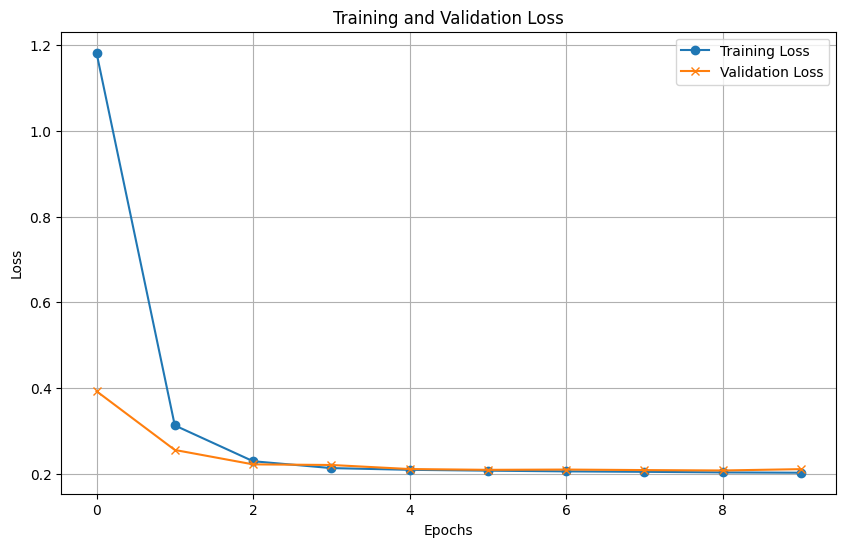

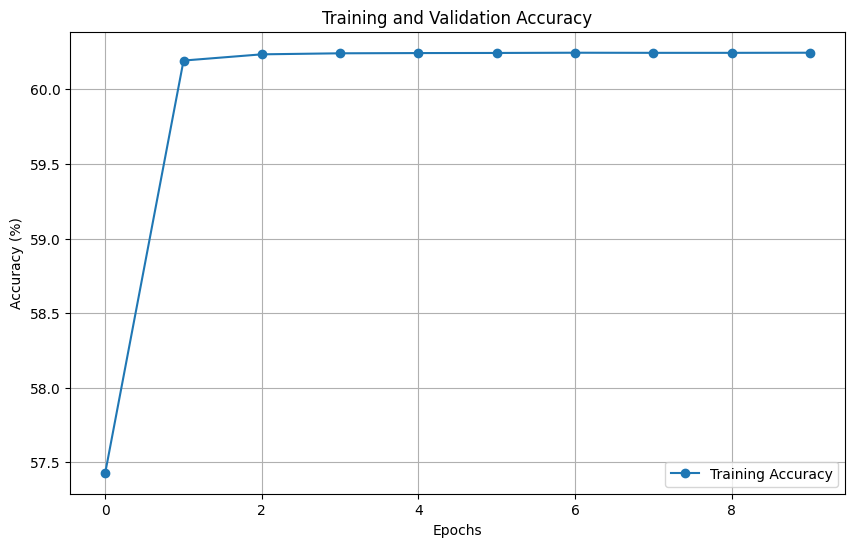

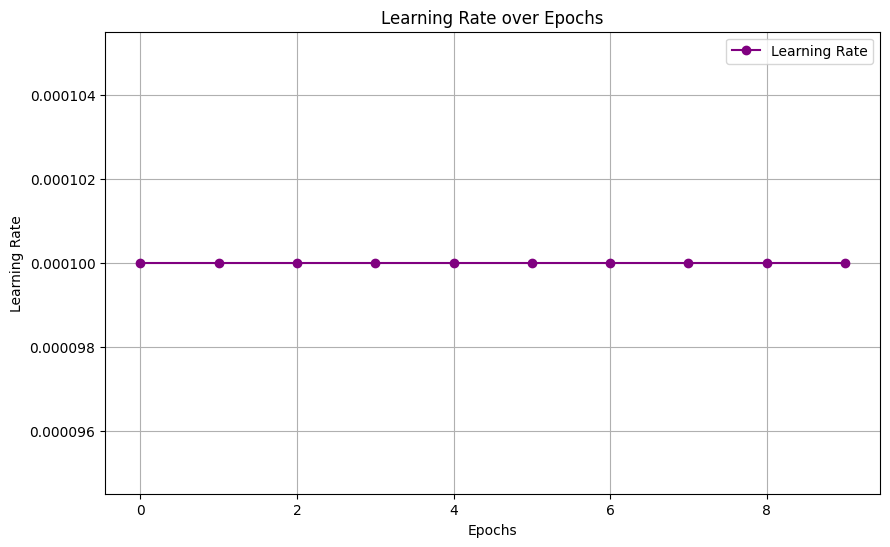

In [38]:
train_losses, val_losses, train_accuracies, learning_rates = train_model(
    encoder=encoder,
    decoder=decoder,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    encoder_optimizer=encoder_optimizer,
    decoder_optimizer=decoder_optimizer,
    num_epochs=num_epochs,
    vocab_size=vocab_size,
    device=device
)
plot_loss_curve(train_losses, val_losses)
plot_accuracy_curve(train_accuracies)
plot_learning_rate(learning_rates)


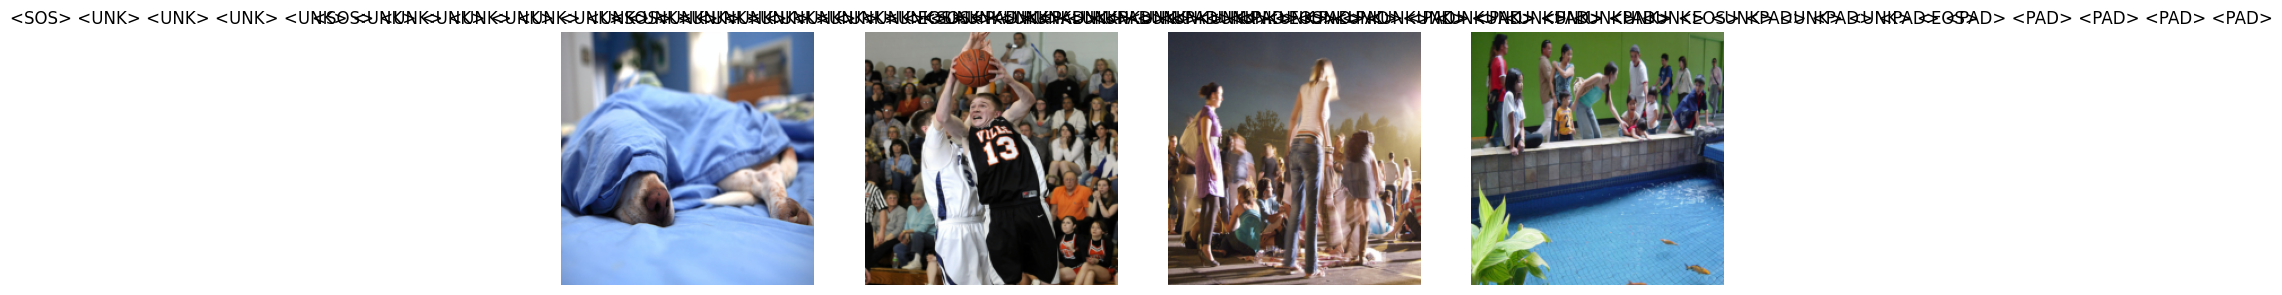

Data visualization completed!


In [39]:
def visualize_predictions(encoder, decoder, test_loader, vocab, device):
    """Visualizes model-generated captions vs actual captions."""
    encoder.eval()
    decoder.eval()

    images, captions = next(iter(test_loader))
    images = images.to(device)

    features = encoder(images)
    sampled_ids = decoder.sample(features)
    sampled_ids = sampled_ids.cpu().numpy()

    predicted_captions = []
    for sampled_id in sampled_ids:
        caption = [word for word, idx in vocab.items() if idx in sampled_id]
        predicted_captions.append(' '.join(caption))

    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    for i in range(4):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        axes[i].imshow(img)
        axes[i].set_title(predicted_captions[i])
        axes[i].axis("off")
    plt.show()
visualize_batch(train_loader, vocab)

In [40]:
import torch

# Function to save model checkpoints
def save_model_checkpoint(encoder, decoder, encoder_optimizer, decoder_optimizer, epoch, save_path=""):
    checkpoint = {
        'encoder_state_dict': encoder.state_dict(),
        'decoder_state_dict': decoder.state_dict(),
        'encoder_optimizer_state_dict': encoder_optimizer.state_dict(),
        'decoder_optimizer_state_dict': decoder_optimizer.state_dict(),
        'epoch': epoch
    }
    torch.save(checkpoint, save_path)
    print(f"Checkpoint saved at epoch {epoch} to {save_path}")

# Example usage: Save model after training
save_model_checkpoint(encoder, decoder, encoder_optimizer, decoder_optimizer, num_epochs, "captioning_model_checkpoint.pth")

print("Step 3.4: Model checkpoint saved successfully!")


Checkpoint saved at epoch 10 to captioning_model_checkpoint.pth
Step 3.4: Model checkpoint saved successfully!


In [41]:
from torch.utils.data import DataLoader

# Assuming `test_dataset` is created similar to train_dataset
test_dataset = CaptionDataset(
    image_folder="flickr8k_dataset/Images",
    captions_dict=captions,  # Make sure captions are preprocessed correctly
    vocab=vocab,
    transform=image_transform  # Use the same transformations as training
)

# Create DataLoader for test set
test_loader = DataLoader(
    test_dataset,
    batch_size=16,  # Choose appropriate batch size
    shuffle=False,
    num_workers=0  # Set to 0 to avoid multiprocessing issues
)

print("Test loader initialized successfully!")


Test loader initialized successfully!


In [47]:
from nltk.translate.bleu_score import corpus_bleu
import torch

def evaluate_model(encoder, decoder, test_loader, vocab, device):
    """
    Evaluate the model using BLEU scores.
    """
    encoder.eval()
    decoder.eval()
    all_references = []
    all_hypotheses = []

    with torch.no_grad():
        for images, captions in test_loader:
            images = images.to(device)

            # Generate features from encoder
            features = encoder(images)

            for i in range(features.size(0)):
                input_word = torch.tensor([vocab['<SOS>']], device=device).unsqueeze(0)
                hidden = None
                sampled_ids = []

                for _ in range(20):  # Max caption length
                    # Corrected line: Use decoder.embed instead of decoder.embedding
                    output, hidden = decoder.lstm(decoder.embed(input_word), hidden)
                    predicted = output.argmax(2)
                    sampled_ids.append(predicted.item())
                    input_word = predicted
                    if predicted.item() == vocab['<EOS>']:
                        break

                # Convert sampled IDs to words
                predicted_caption = [
                    word for idx in sampled_ids if idx in vocab.values()
                    for word, word_idx in vocab.items() if word_idx == idx
                ]
                reference_caption = [
                    [word for idx in caption if idx in vocab.values() for word, word_idx in vocab.items() if word_idx == idx]
                    for caption in captions.tolist()
                ]

                all_hypotheses.append(predicted_caption)
                all_references.append(reference_caption)

    # Calculate BLEU score
    bleu_score = corpus_bleu(all_references, all_hypotheses)
    print(f"BLEU Score: {bleu_score:.4f}")

    return bleu_score

print("Updated BLEU evaluation function!")

Updated BLEU evaluation function!


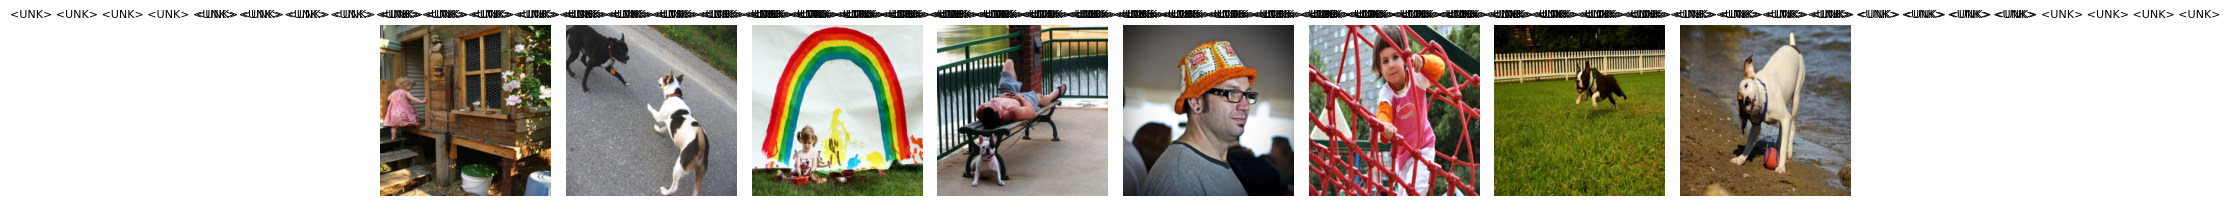

Predictions visualized successfully!


In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Function to denormalize images
def denormalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """Reverses normalization for proper visualization."""
    image = image.numpy().transpose(1, 2, 0)  # Convert to HxWxC format
    image = image * np.array(std) + np.array(mean)  # Denormalize
    image = np.clip(image, 0, 1)  # Ensure pixel values are valid
    return image

# Function to visualize predictions
def visualize_predictions(encoder, decoder, data_loader, vocab, device, max_images=8):
    """
    Visualizes predictions for a batch of images.
    Args:
        encoder: Trained encoder model.
        decoder: Trained decoder model.
        data_loader: DataLoader for the test set.
        vocab: Vocabulary mapping.
        device: Device to run the visualization on.
        max_images: Maximum number of images to display.
    """
    encoder.eval()
    decoder.eval()

    images, captions = next(iter(data_loader))
    images = images[:max_images].to(device)  # Limit the number of images to `max_images`
    captions = captions[:max_images]  # Limit captions accordingly

    with torch.no_grad():
        features = encoder(images)
        outputs = [decoder.sample(features[i].unsqueeze(0)) for i in range(len(images))]  # Ensure sampling is per image

    # Set up grid for visualization
    num_images = min(max_images, len(images))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for idx in range(num_images):
        ax = axes[idx] if num_images > 1 else axes

        # Denormalize and display image
        image = denormalize(images[idx].cpu())
        ax.imshow(image)
        ax.axis("off")

        # Generate predicted caption
        predicted_caption = [
            word for word_idx in outputs[idx]
            if word_idx in vocab.values()
            for word, id_val in vocab.items() if id_val == word_idx
        ]

        caption_str = " ".join(predicted_caption)
        ax.set_title(caption_str, fontsize=8)

    plt.tight_layout()
    plt.show()

    print("Predictions visualized successfully!")

# Example usage
visualize_predictions(encoder, decoder, test_loader, vocab, device)

BLEU Score: 0.0000


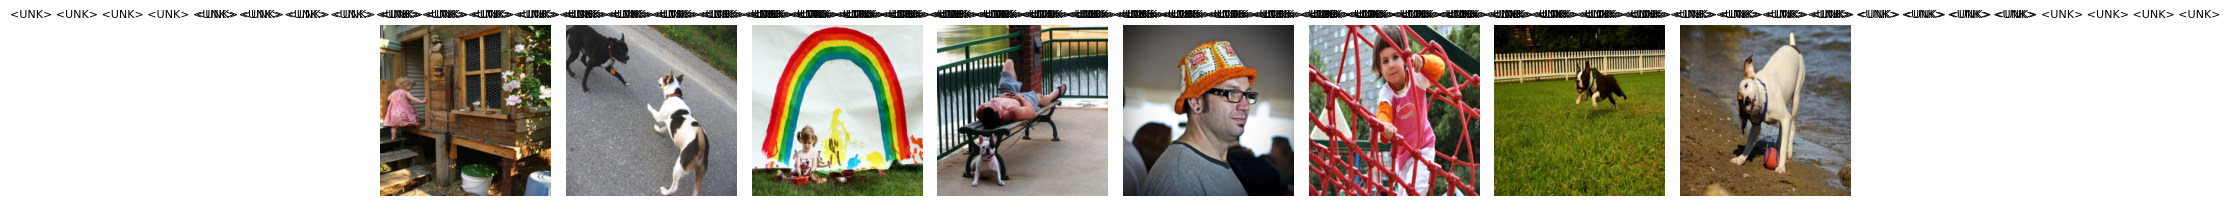

Predictions visualized successfully!
BLEU Score: 0.0000


In [49]:
bleu_score = evaluate_model(encoder, decoder, test_loader, vocab, device)
visualize_predictions(encoder, decoder, test_loader, vocab, device)
print(f"BLEU Score: {bleu_score:.4f}")

4) Step 4: Model Testing & Visualization


In [50]:
# Step 4.1: Install Hugging Face CLI and login
!pip install huggingface_hub

# Login to your Hugging Face account
from huggingface_hub import notebook_login

notebook_login()
print("Step 4.1: Hugging Face login successful!")

Step 4.1: Hugging Face login successful!


In [51]:
import torch

# Save the trained encoder and decoder models locally
torch.save(encoder.state_dict(), "encoder.pth")
torch.save(decoder.state_dict(), "decoder.pth")

print("Step 4.2: Models saved successfully!")

Step 4.2: Models saved successfully!


In [53]:
from huggingface_hub import HfApi

repo_id = "Srivardhan369/attention_mechanism_369"
api = HfApi()

# Upload encoder
api.upload_file(
    path_or_fileobj="encoder.pth",
    path_in_repo="encoder.pth",
    repo_id=repo_id
)

# Upload decoder
api.upload_file(
    path_or_fileobj="decoder.pth",
    path_in_repo="decoder.pth",
    repo_id=repo_id
)

print(f"Models uploaded to Hugging Face: {repo_id}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


encoder.pth:   0%|          | 0.00/96.5M [00:00<?, ?B/s]

decoder.pth:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

Models uploaded to Hugging Face: Srivardhan369/attention_mechanism_369


In [54]:
from huggingface_hub import hf_hub_download
import torch

repo_id = "Srivardhan369/attention_mechanism_369"

# Download models
encoder_path = hf_hub_download(repo_id=repo_id, filename="encoder.pth")
decoder_path = hf_hub_download(repo_id=repo_id, filename="decoder.pth")

print("Models downloaded successfully!")


encoder.pth:   0%|          | 0.00/96.5M [00:00<?, ?B/s]

decoder.pth:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

Models downloaded successfully!
